In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
import os
from pdf2image import convert_from_path
from scipy.signal import find_peaks
import tempfile
import warnings
warnings.filterwarnings('ignore')

In [54]:
#with open('Toggle Switch/datatoggle.json') as json_file:
with open('300 GR: 1.0/data300gr:10.json') as json_file:  
    database = json.load(json_file)

### Effective Growth Rate analysis

In [2]:
with open('300 GR: 1.0/effgrowthrate.json') as json_file:  
    effs = json.load(json_file)

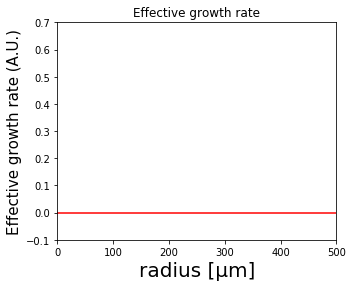

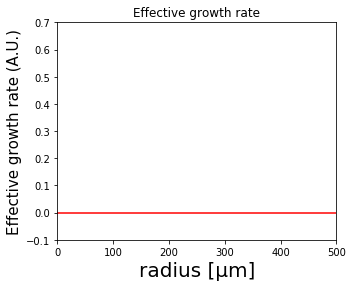

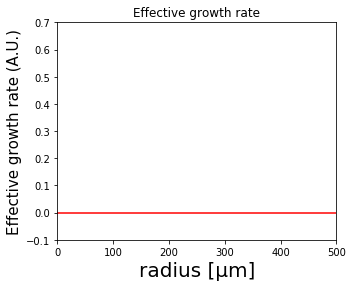

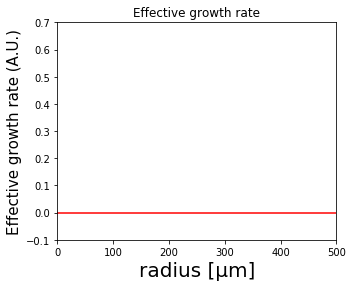

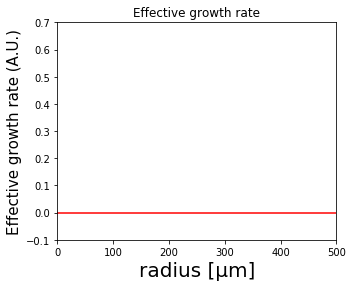

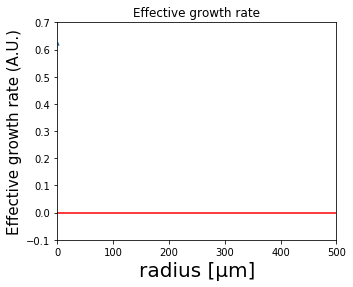

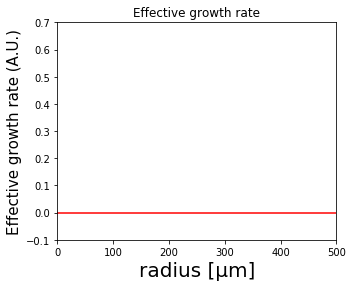

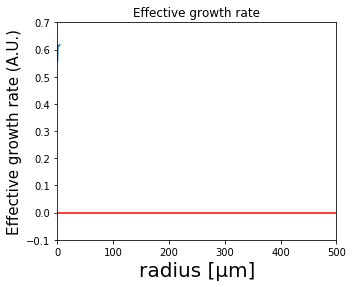

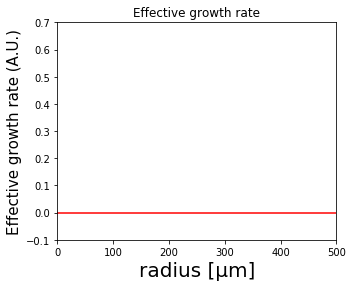

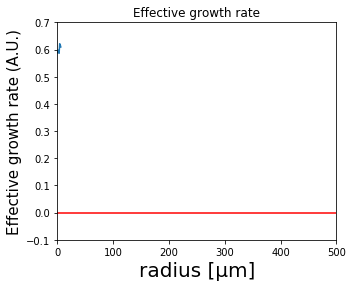

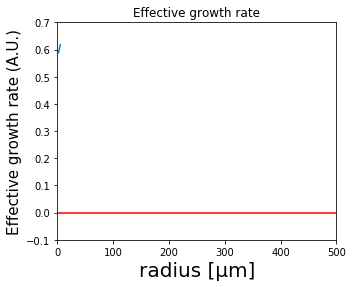

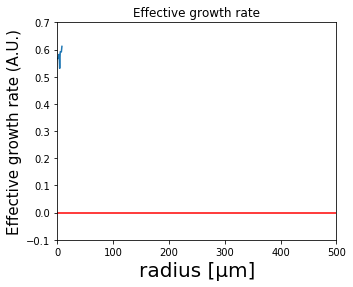

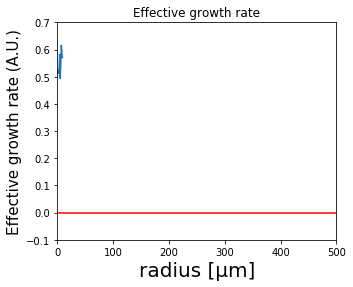

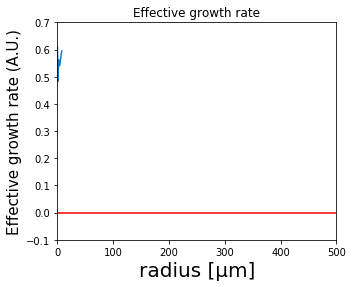

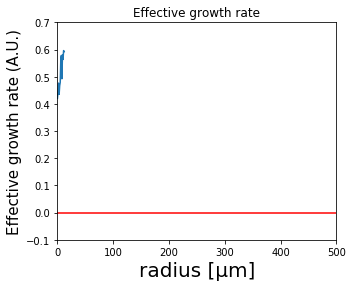

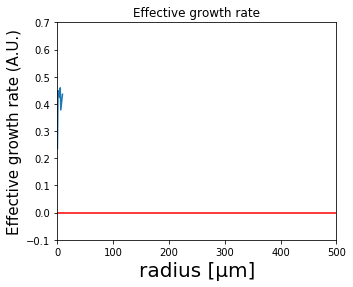

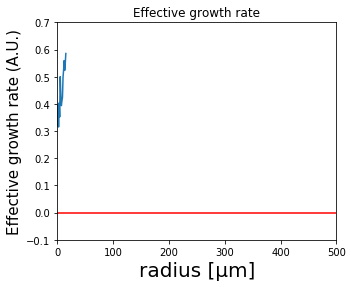

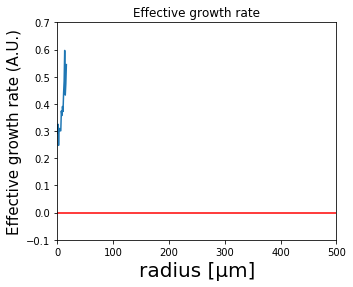

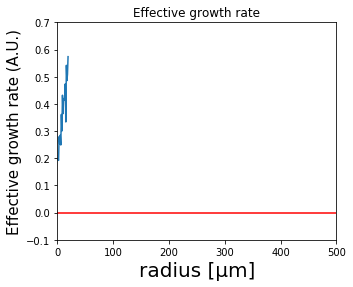

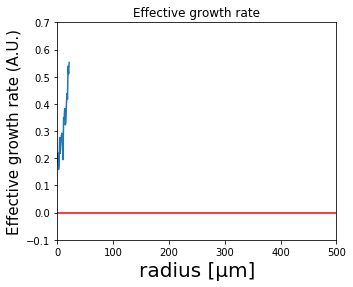

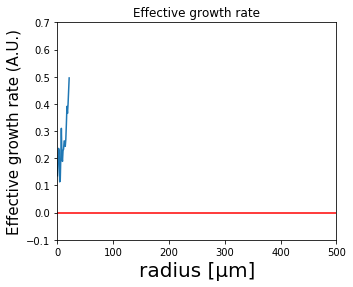

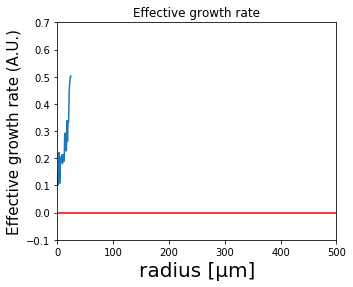

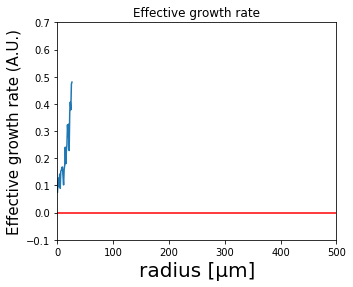

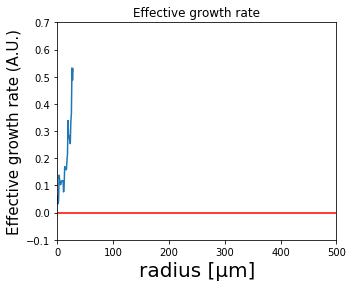

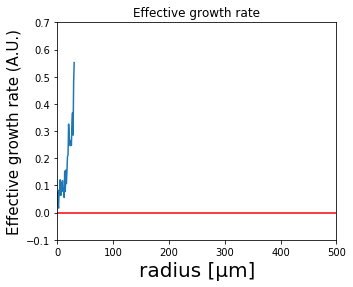

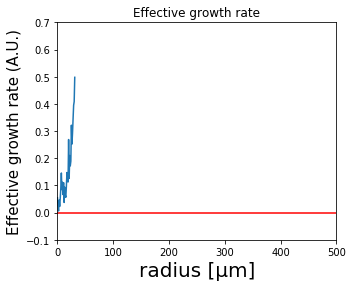

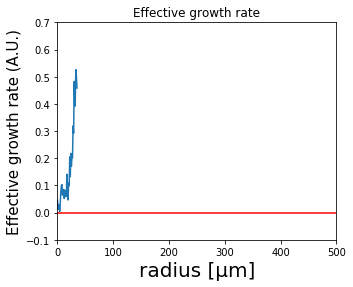

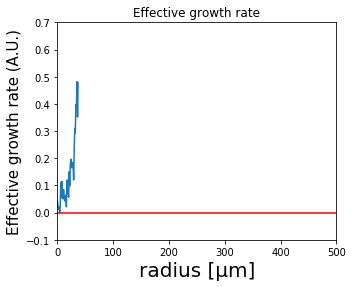

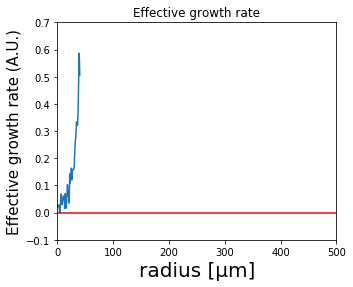

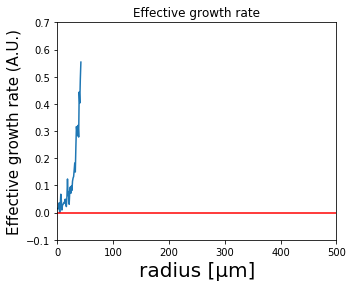

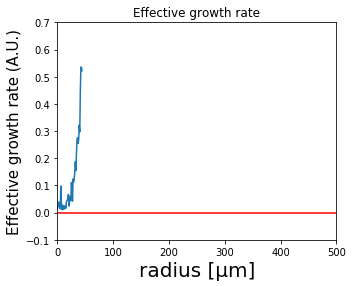

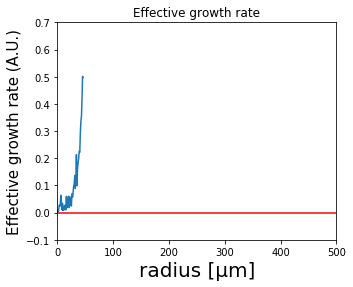

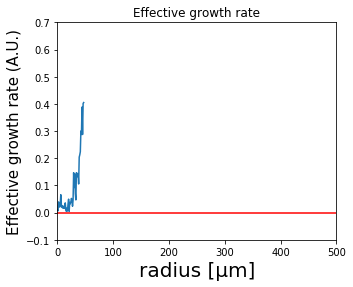

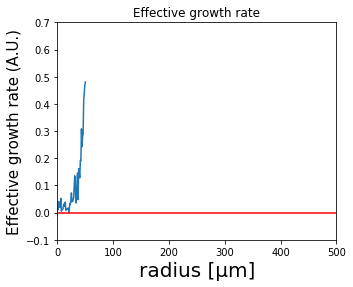

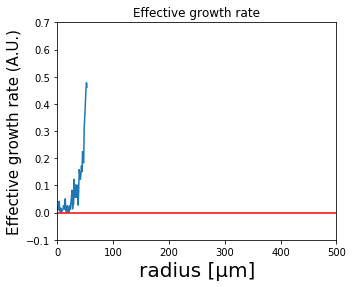

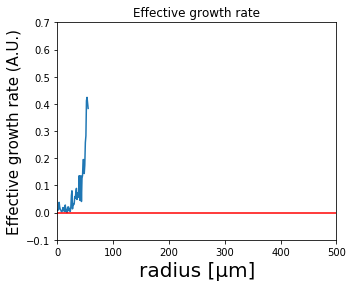

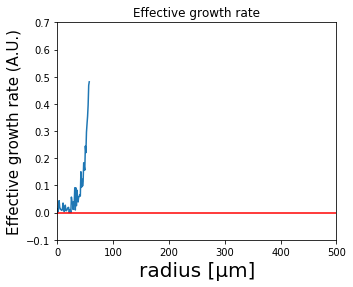

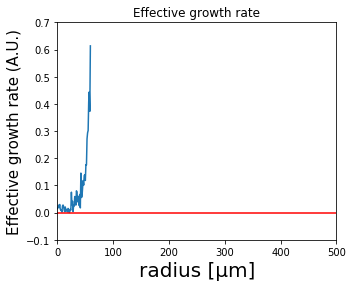

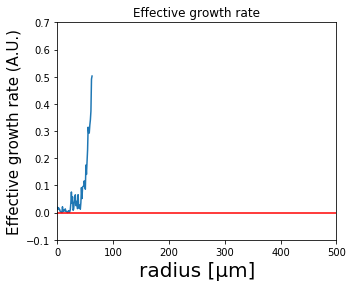

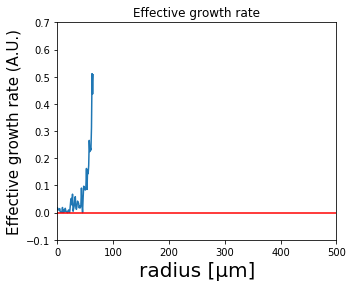

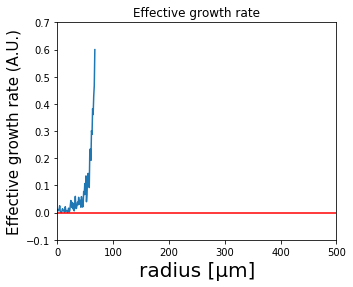

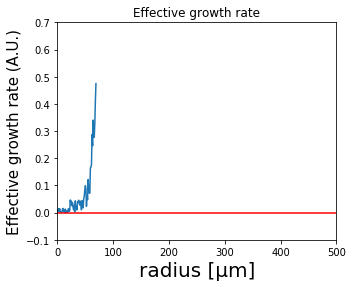

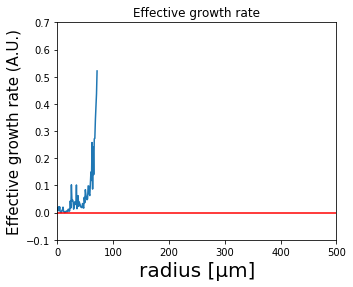

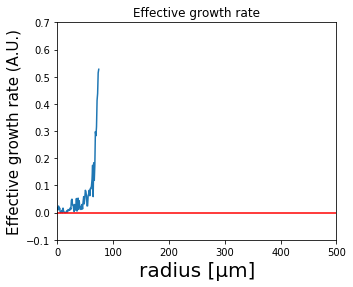

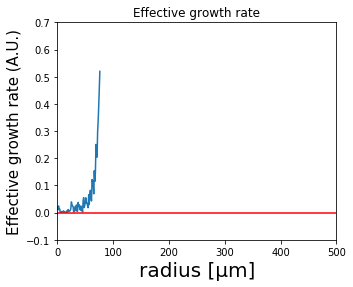

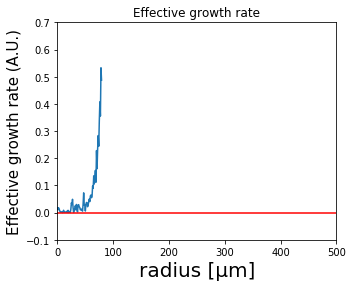

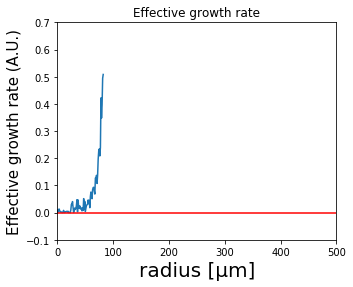

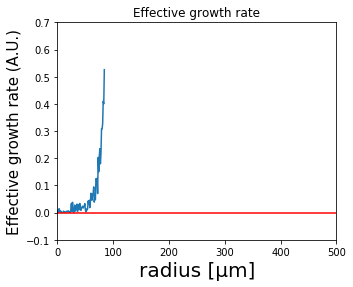

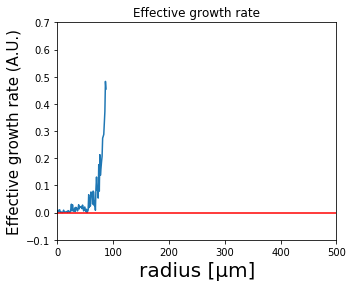

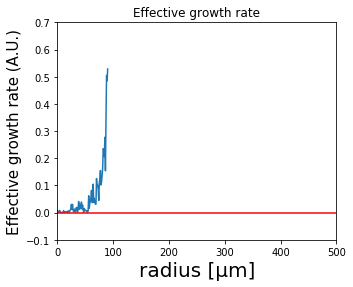

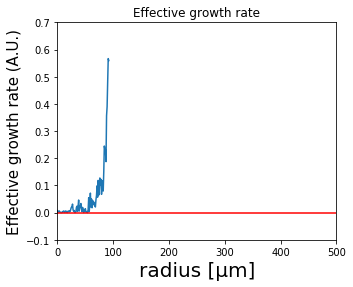

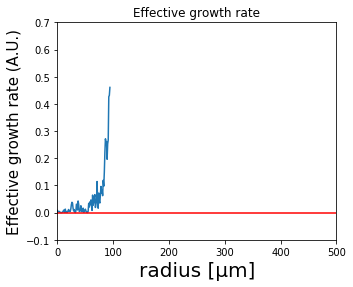

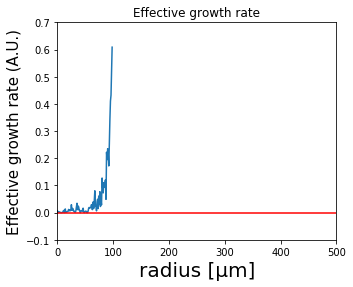

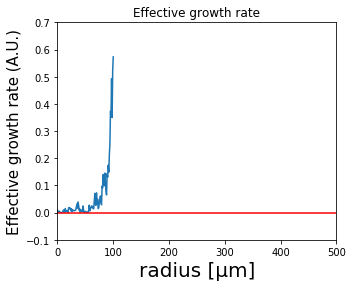

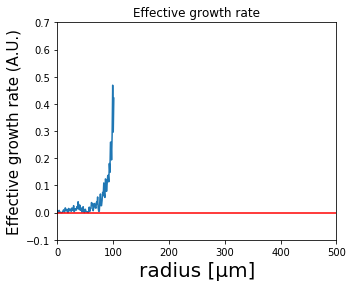

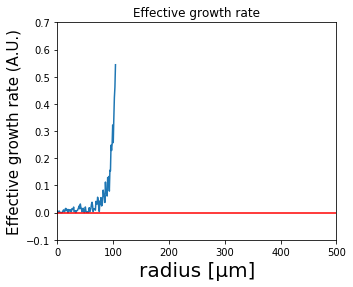

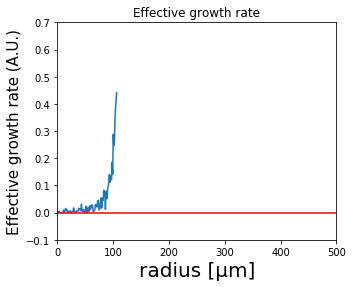

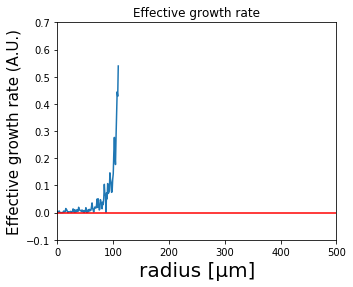

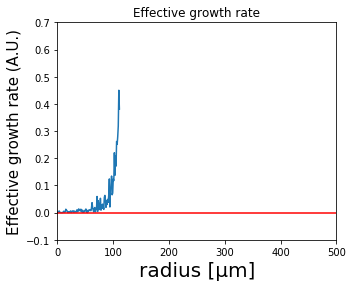

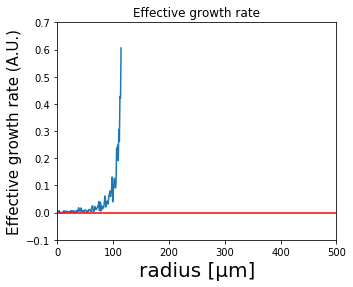

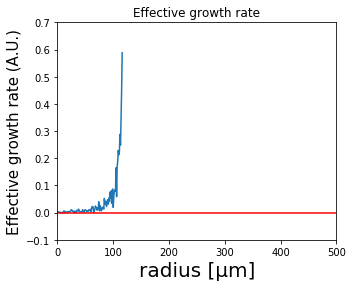

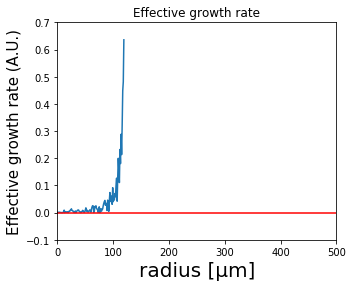

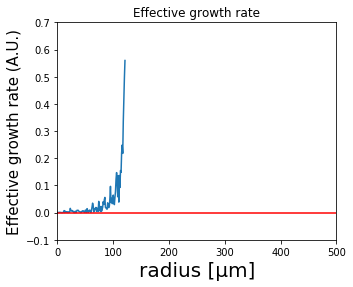

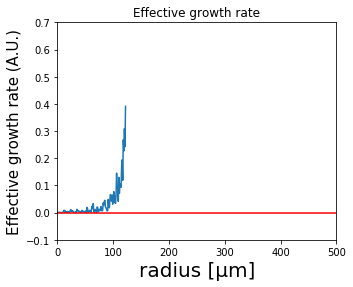

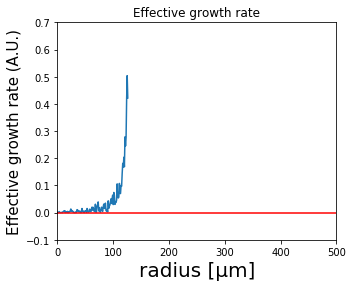

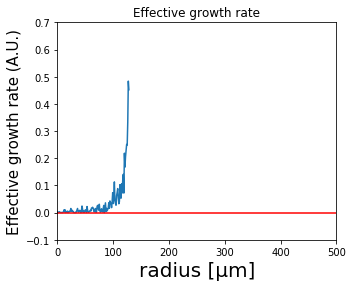

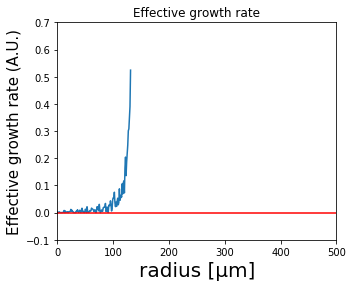

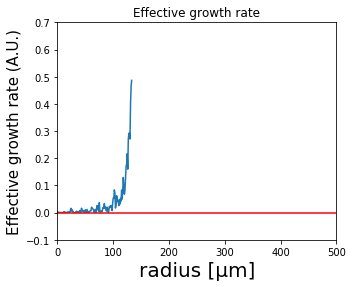

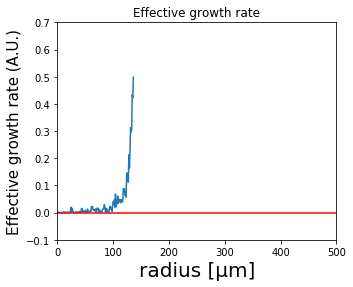

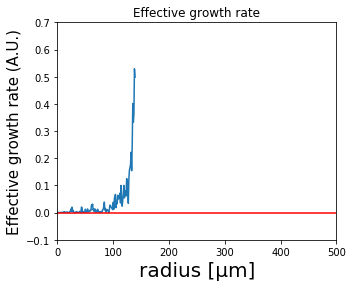

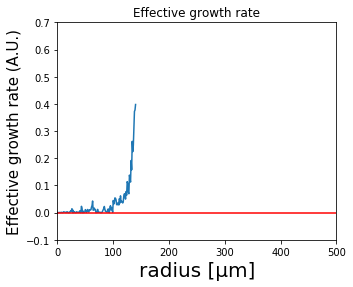

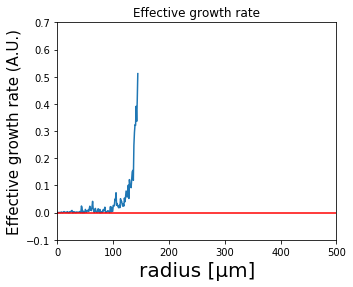

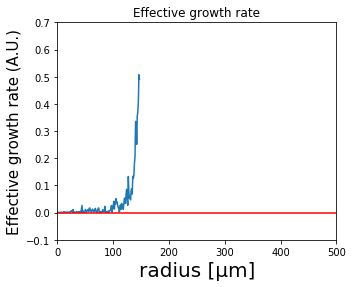

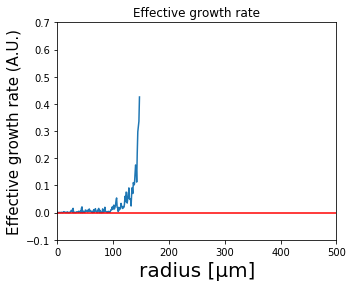

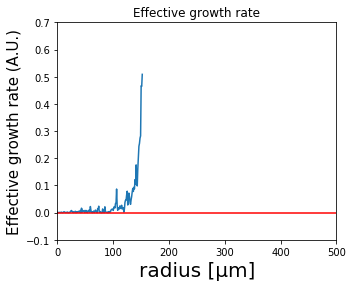

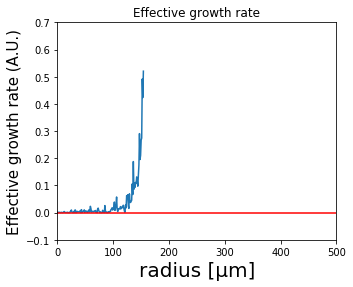

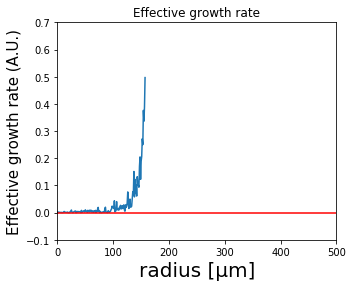

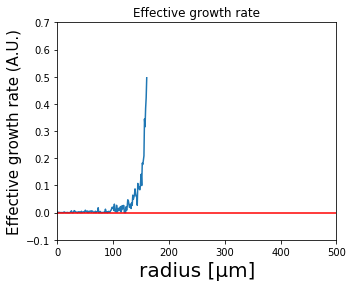

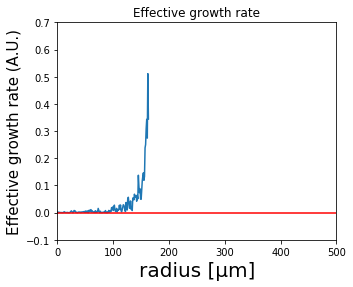

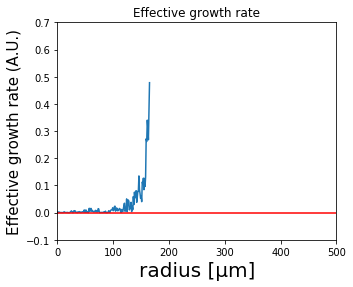

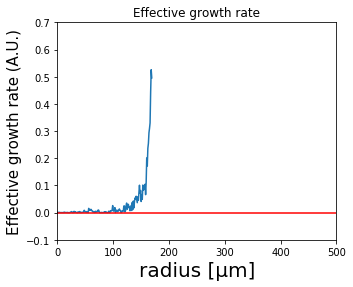

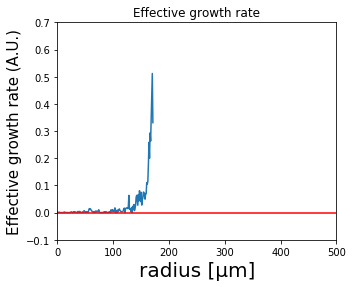

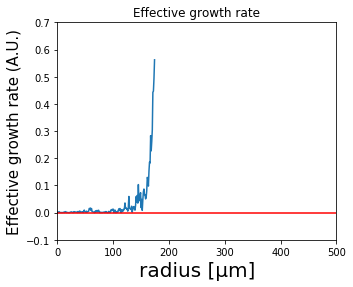

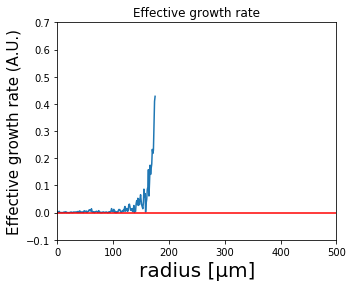

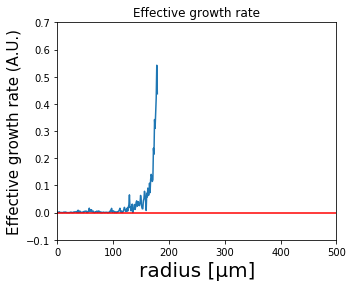

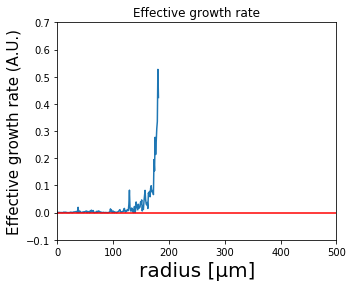

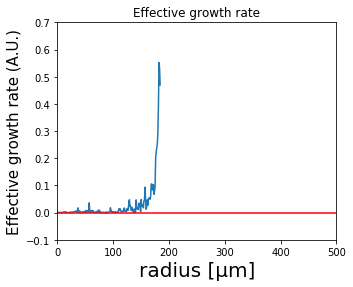

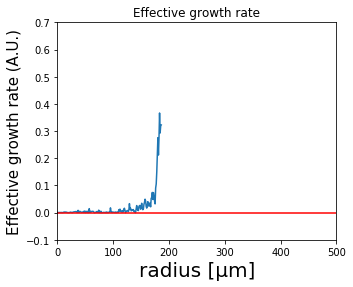

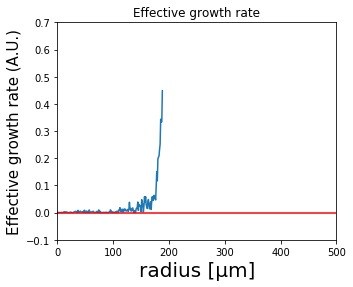

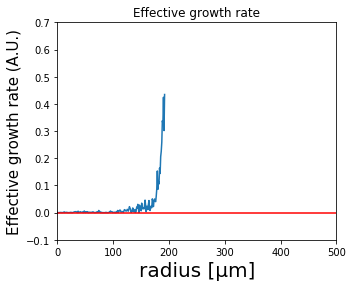

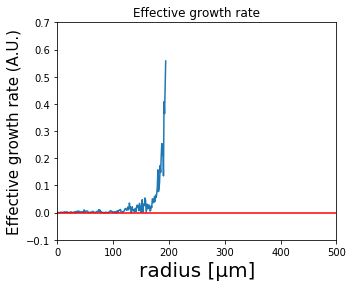

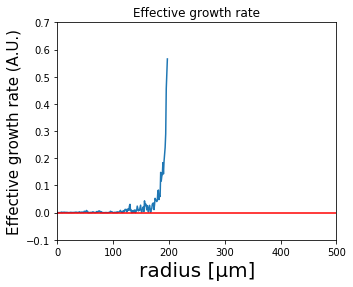

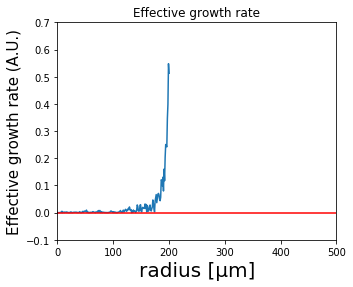

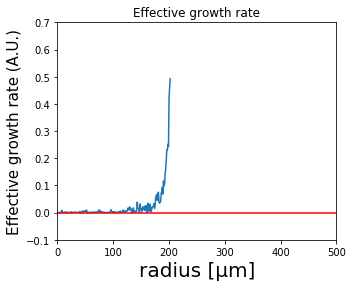

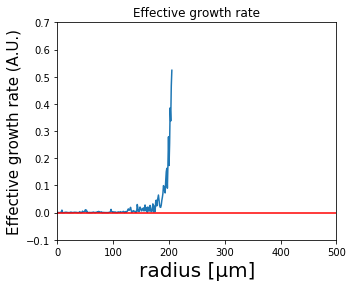

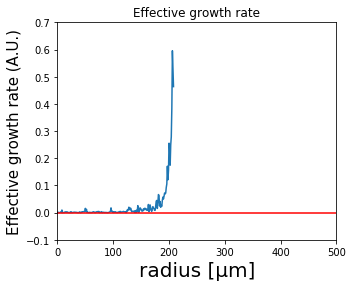

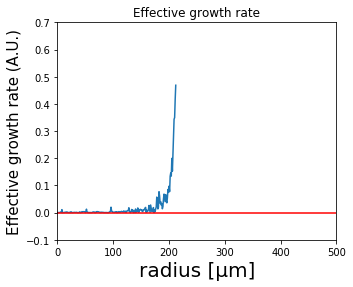

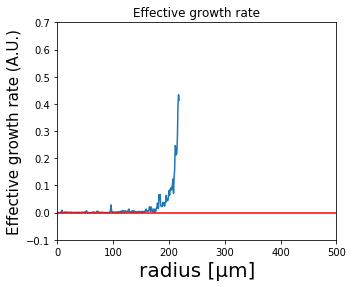

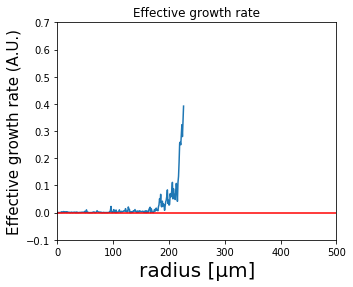

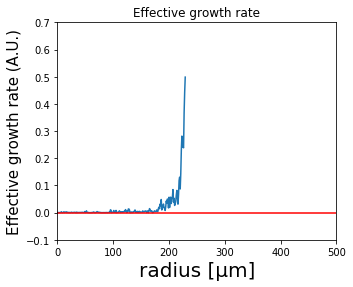

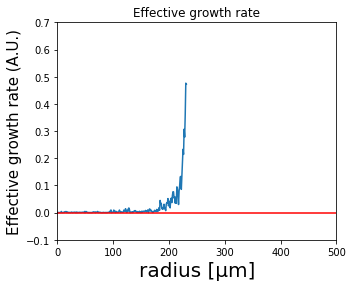

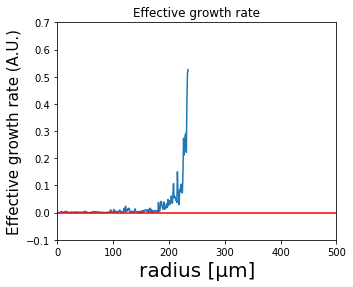

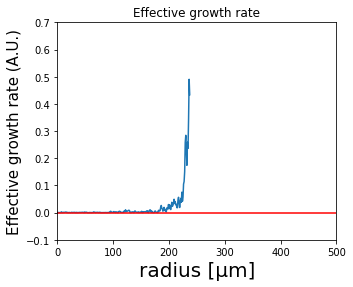

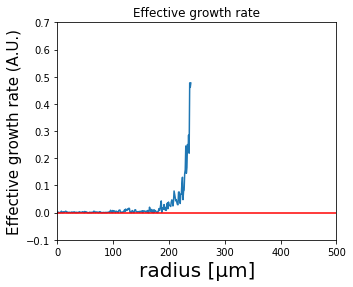

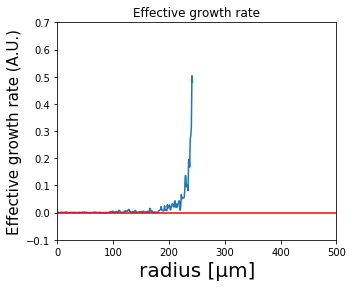

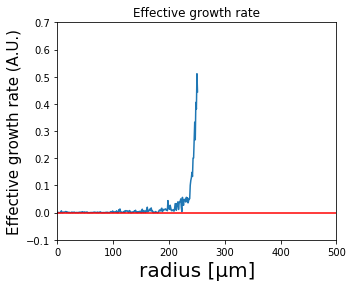

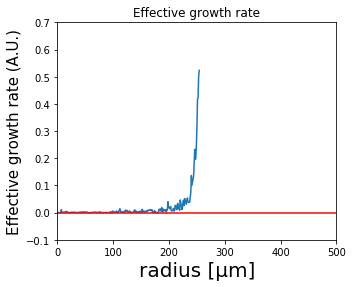

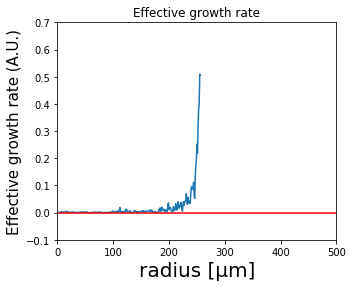

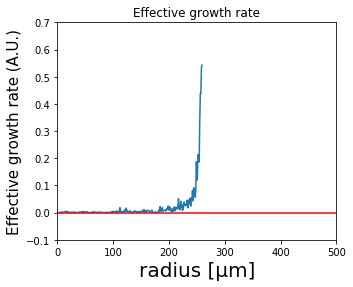

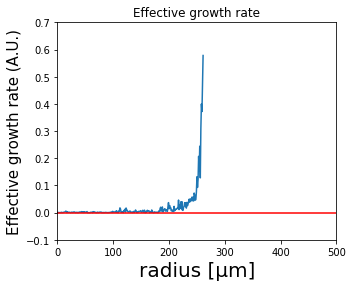

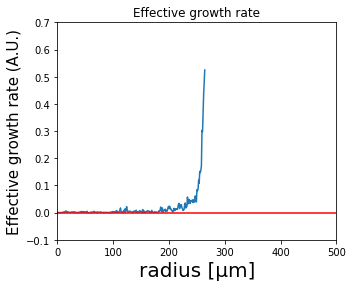

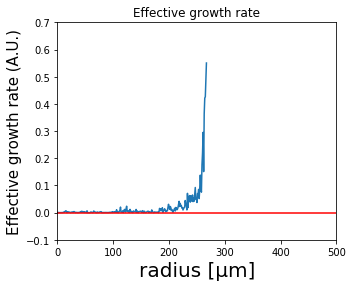

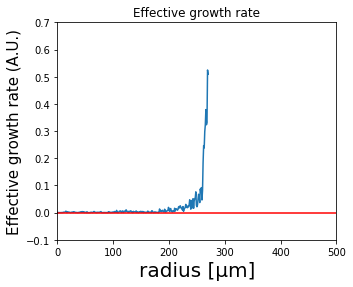

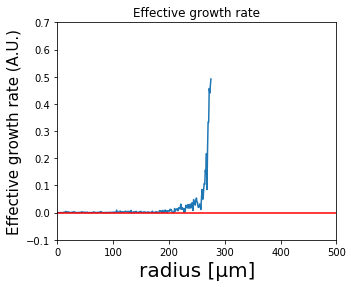

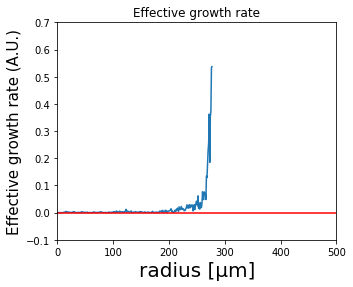

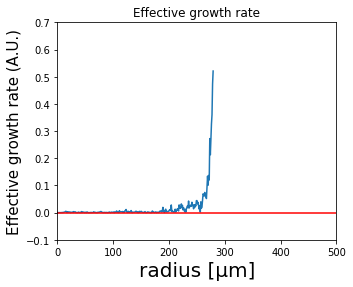

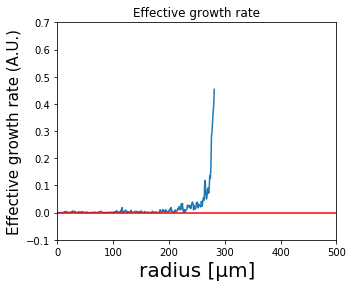

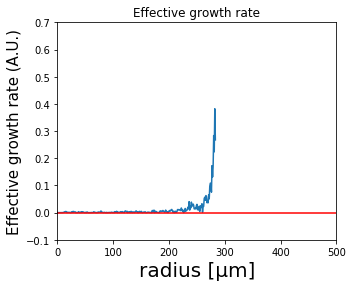

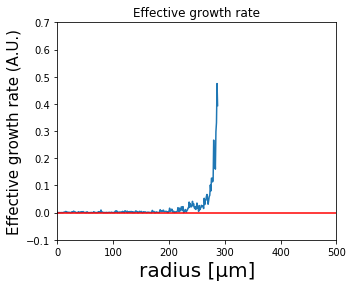

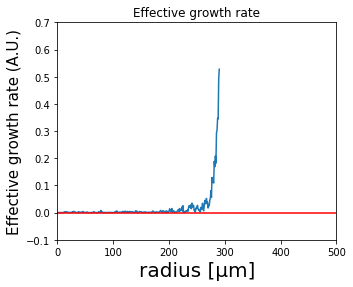

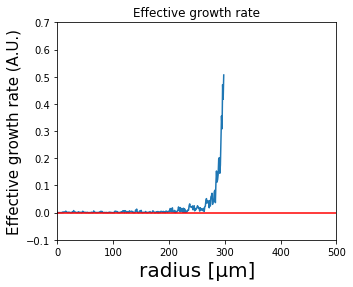

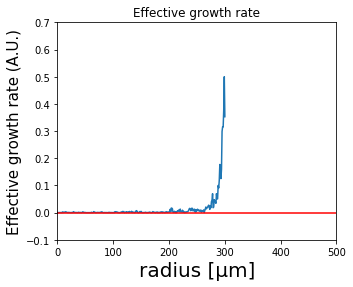

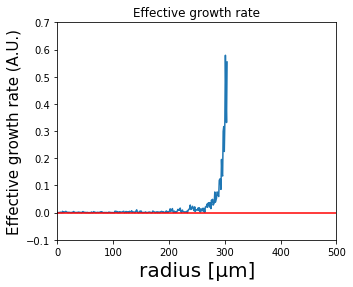

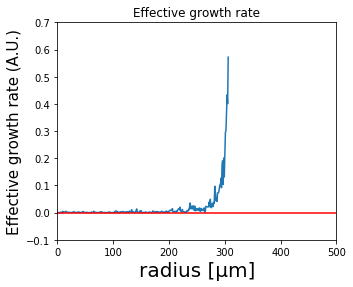

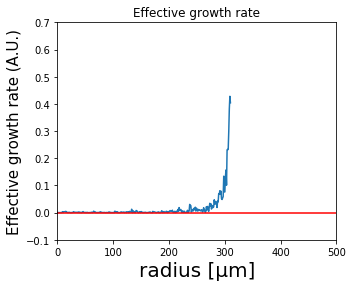

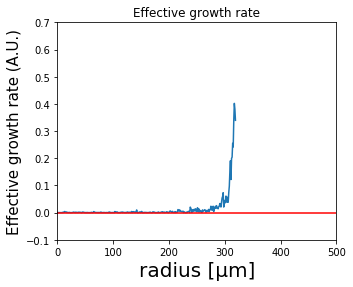

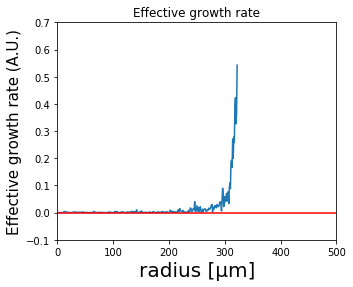

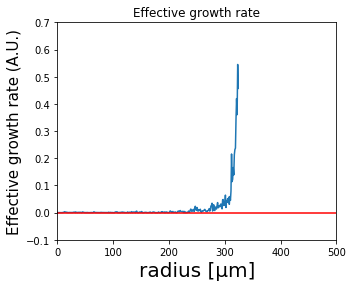

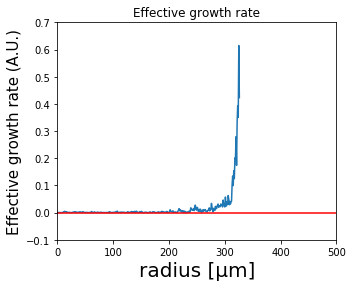

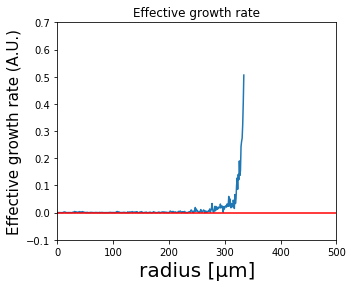

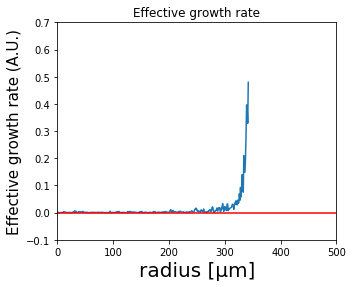

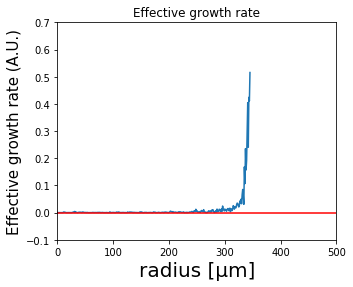

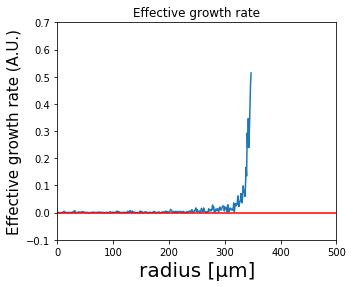

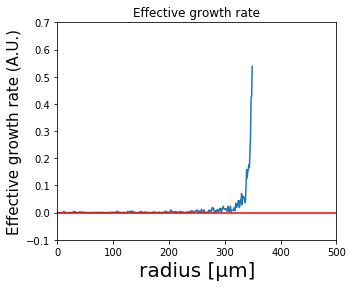

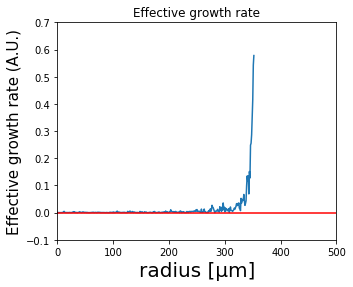

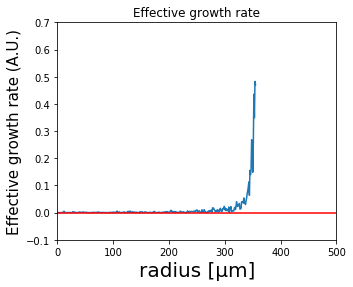

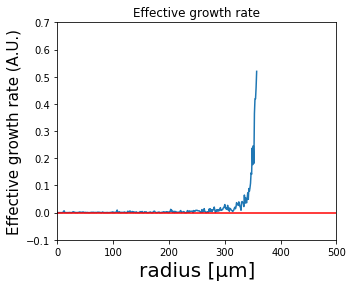

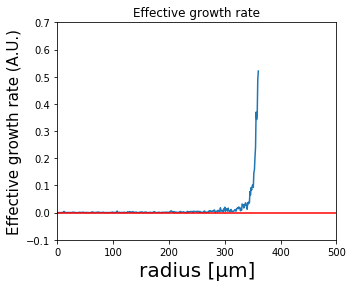

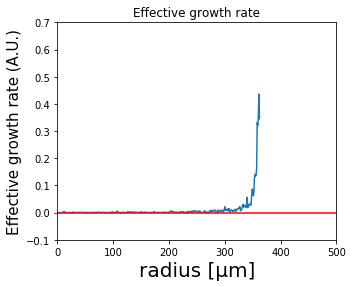

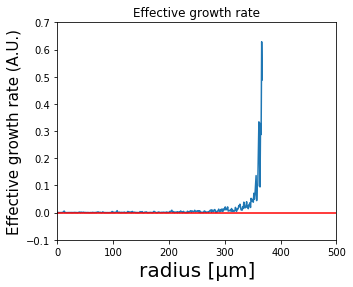

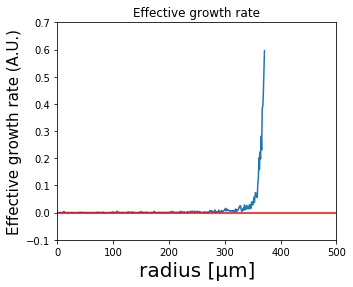

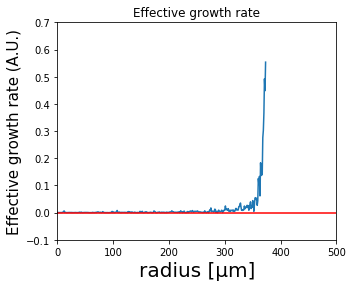

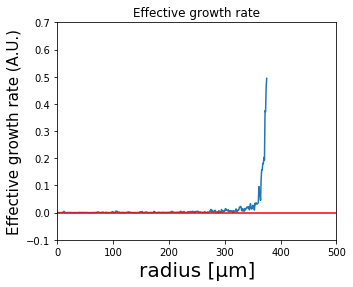

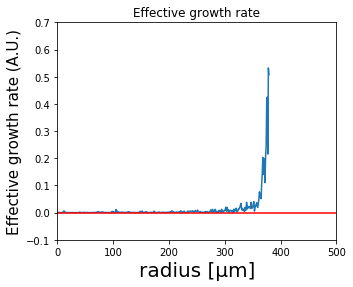

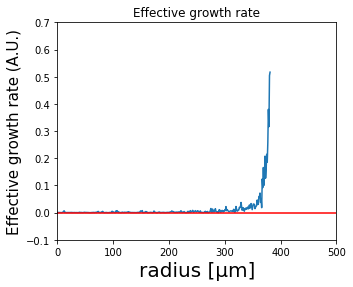

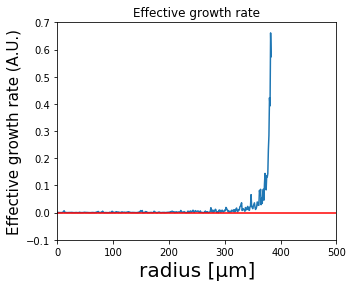

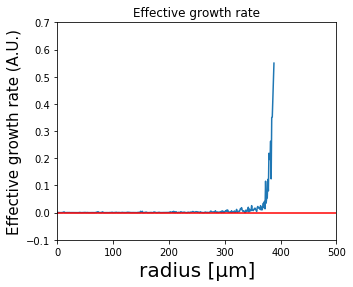

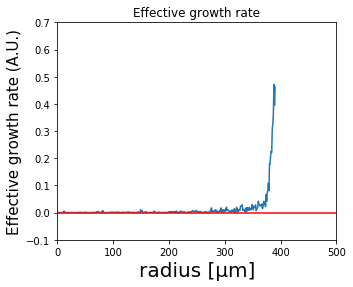

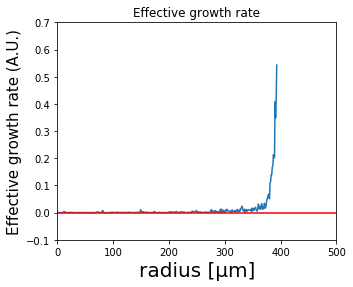

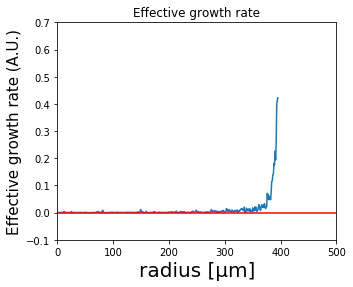

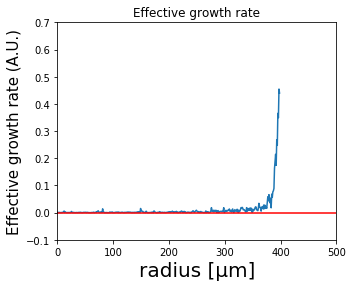

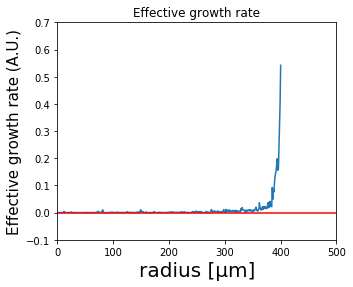

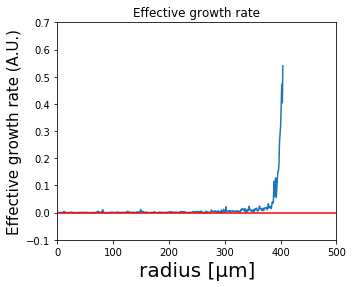

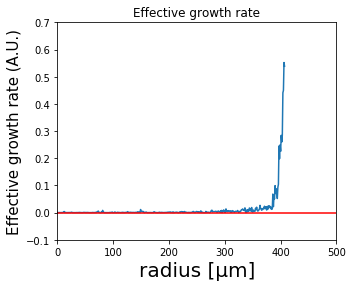

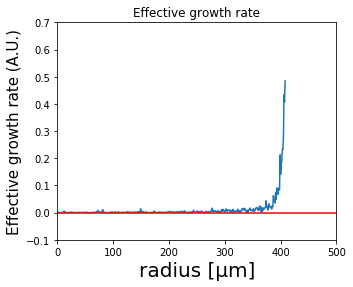

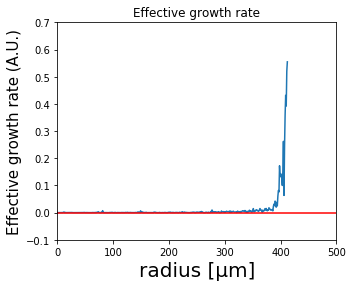

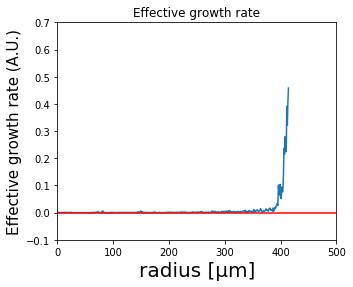

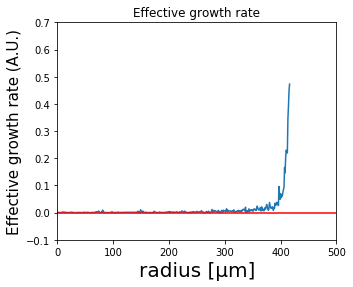

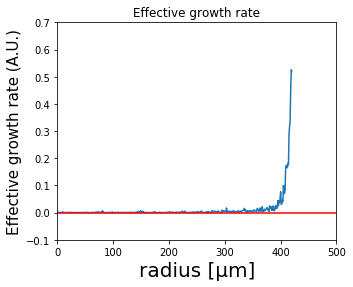

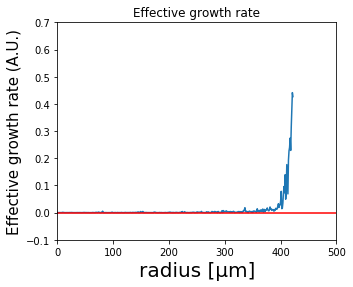

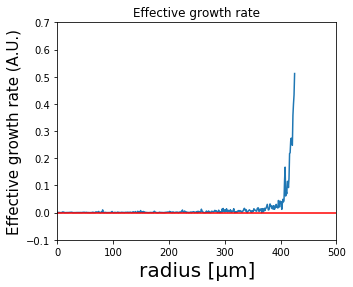

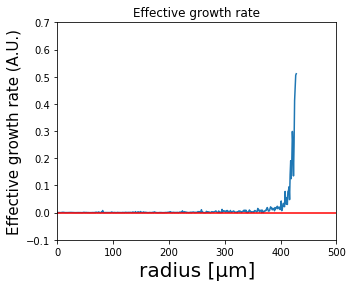

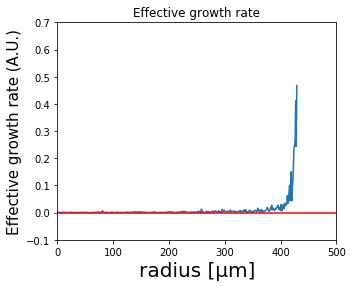

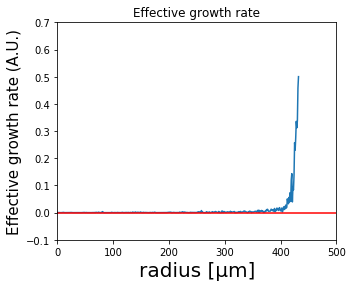

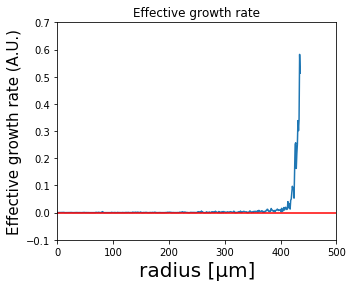

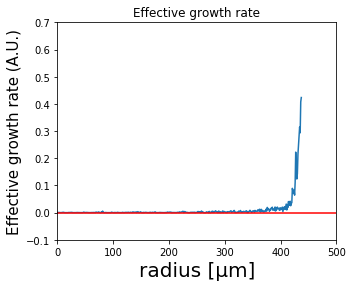

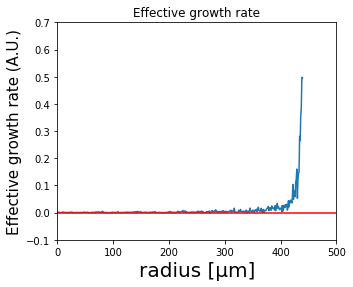

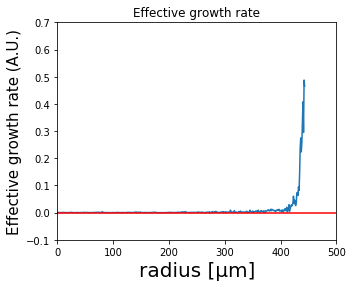

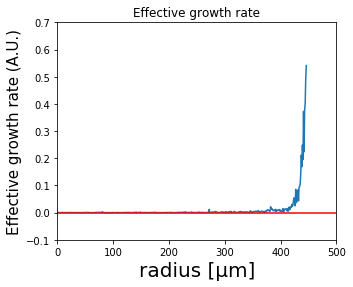

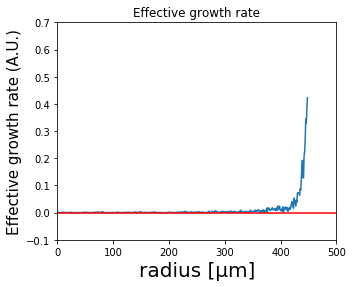

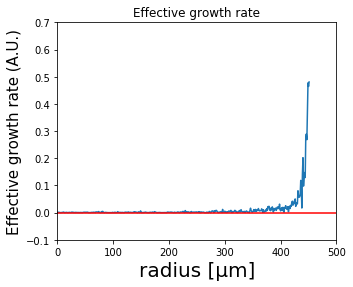

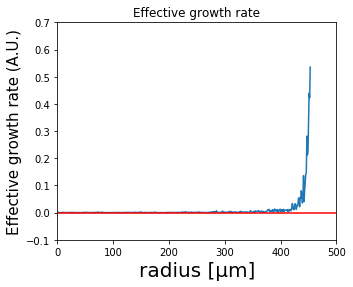

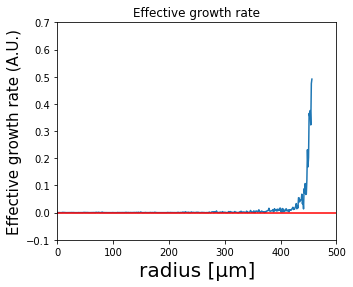

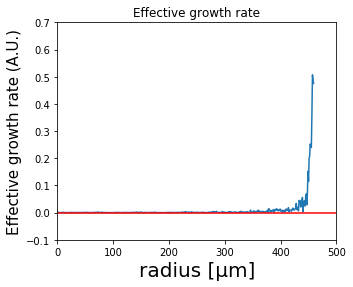

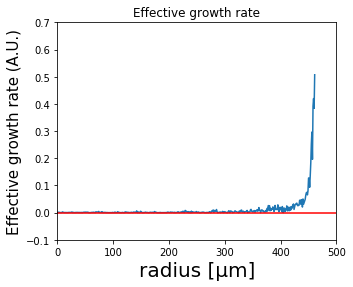

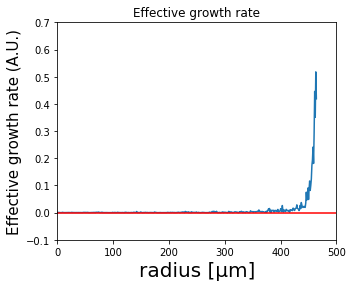

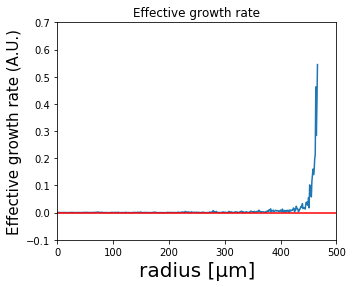

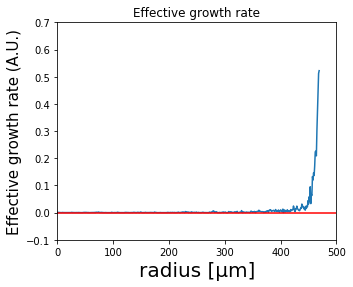

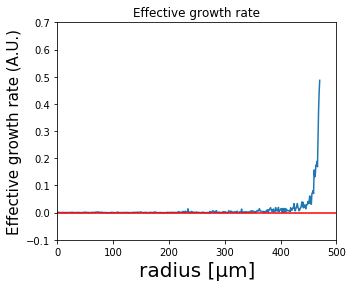

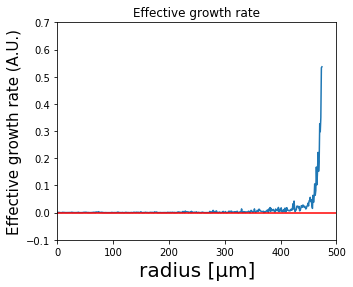

In [23]:
for ef in effs:
    plt.plot(ef[0], ef[1])
    plt.xlim(0, 500)
    plt.ylim(-0.1, 0.7)
    plt.axhline(y=0, color='r')
    plt.ylabel('Effective growth rate (A.U.)', fontsize = 15)
    plt.xlabel(u'radius [\u03bcm]', fontsize = 20)
    plt.title('Effective growth rate')
    plt.show();

#### Kymograph

In [19]:
db_length = len(effs)
# Time
t = [d[2] for d in effs]

# Max lenght for the array
max_ind_0 = np.where(np.array(effs[db_length-1][1]) >=0)
maxima = len(max_ind_0[0])

In [21]:
maxima

475

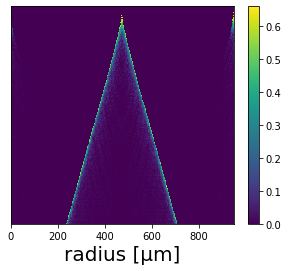

In [18]:
# Generate the vectors
posB = []
# AREGLAR PARA EL ULTIMO DATO
for i, d in enumerate(effs):
    vec_maxB = np.zeros(maxima)
    ind = np.where(np.array(d[1]) >= 0)[0]
    if i == (len(effs)-1):
        break
    else:
        vec_maxB[ind-int(len(d[0])/2)] = np.array(d[1])[ind]
    posB.append(vec_maxB)

# CHANGE THE REFLECTION, IT IS JUST TO HAVE AN IDEA
# Reflect the vectors so we see the whole colony traveling waves
arr = np.array(posB)
length = len(arr[0])
posB2 = np.zeros([len(posB), 2*len(posB[0])])
for i, p in enumerate(posB):
    max_vector = np.zeros(2*length)
    max_vector[0:length] = np.flip(p)
    max_vector[length:] = p
    posB2[i] = max_vector

# PLOT
plt.rcParams['figure.figsize'] = 5, 4
#plt.title("Growth rate = {}".format(file[8:11]))
#plt.title("No dilution")
#plt.figure()
#im = plt.imshow(posB2)
plt.pcolor(np.flip(posB2))
plt.colorbar()
plt.xlabel(u'radius [\u03bcm]', fontsize = 20)
#plt.ylabel('Time [A.U.]', fontsize = 20)
#plt.xticks([-500, -300, - 100, 100, 300, 500])
plt.yticks([])
plt.show();

### Antes de generar .png borro los existentes

In [74]:
files = os.listdir('plots/')
for f in files:
    os.remove('plots/'+f)

### Genero los .png que luego uso para generar el video de la onda viajera

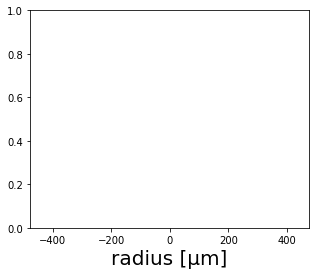

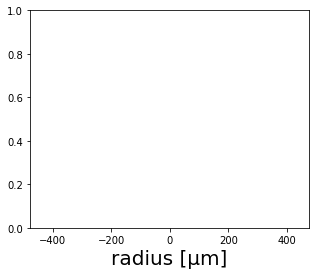

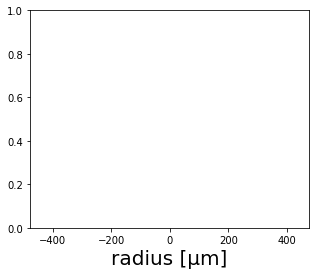

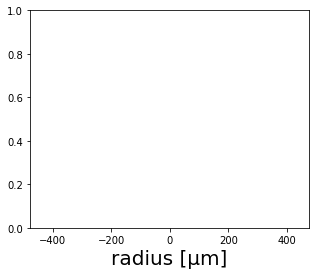

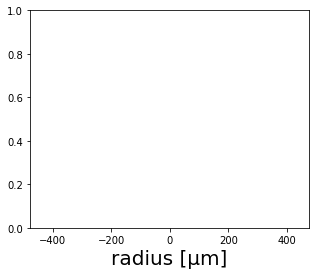

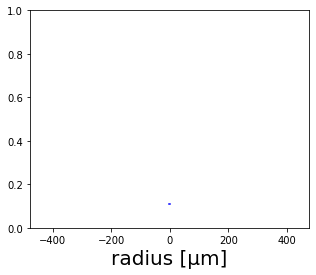

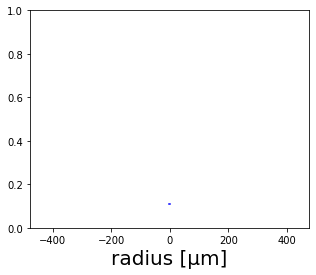

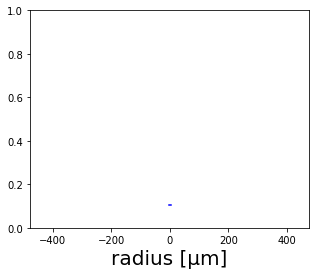

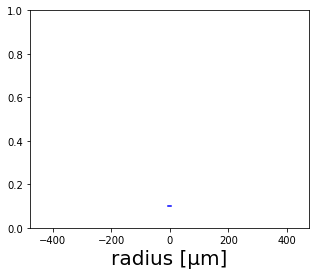

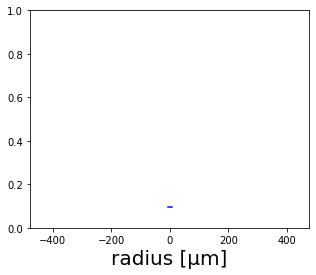

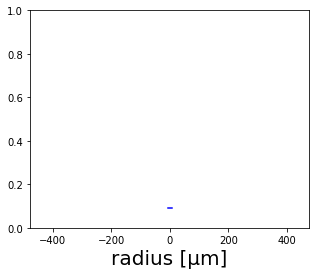

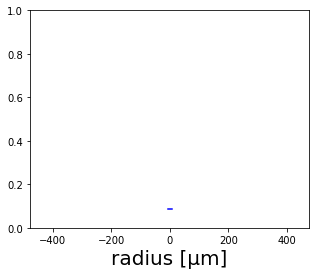

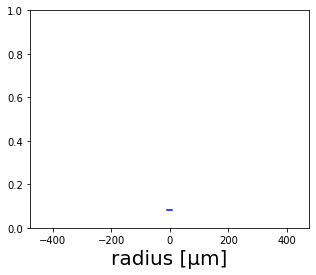

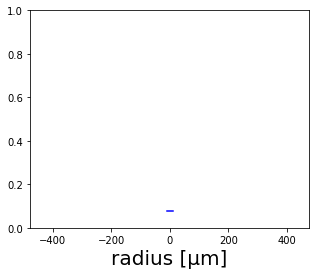

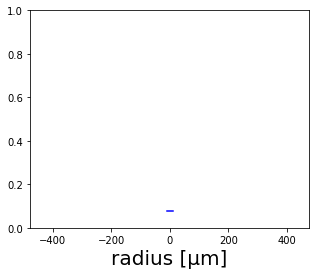

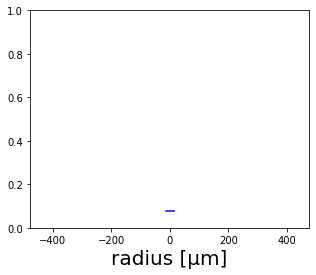

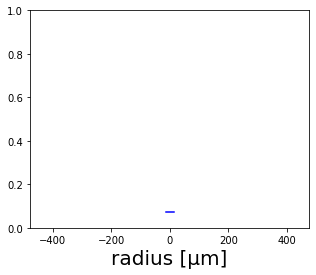

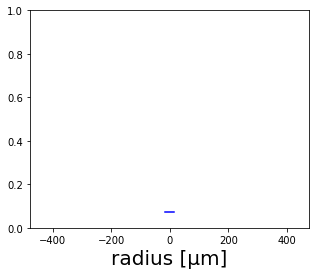

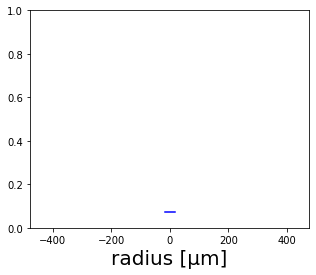

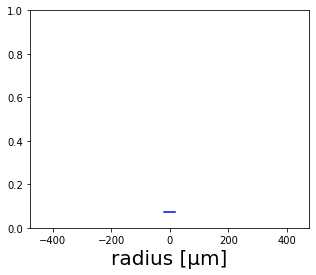

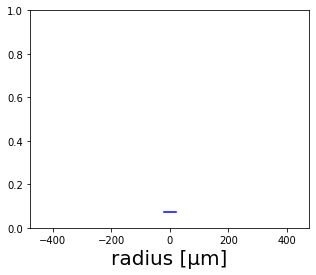

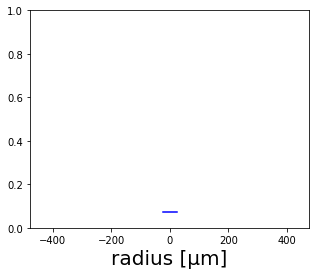

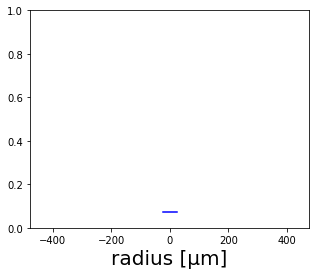

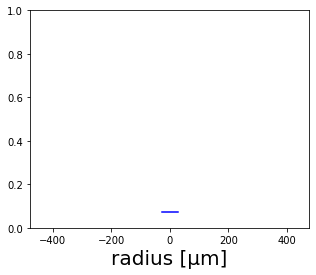

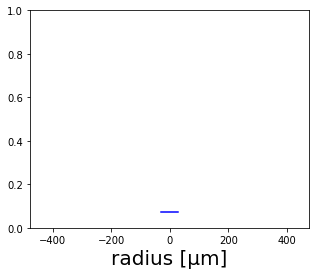

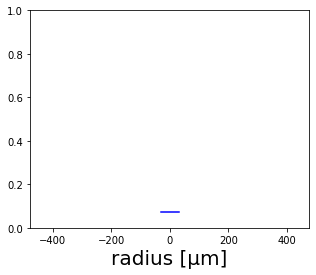

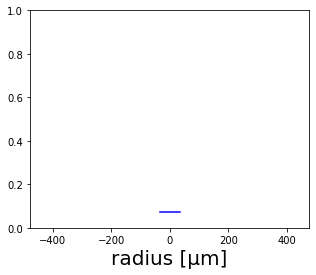

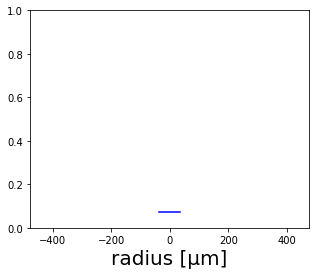

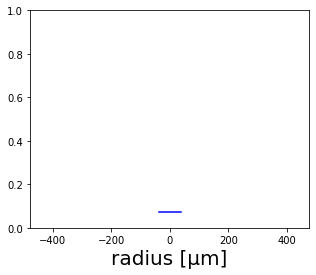

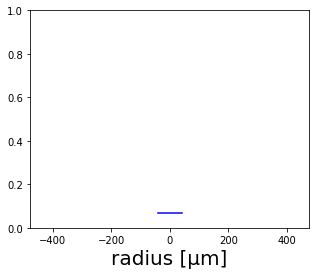

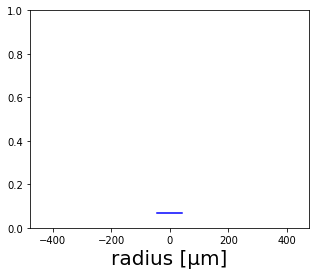

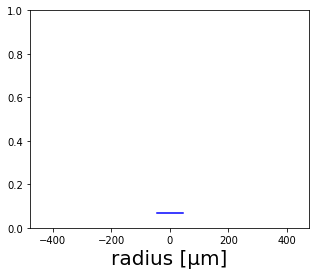

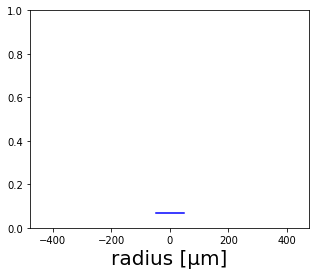

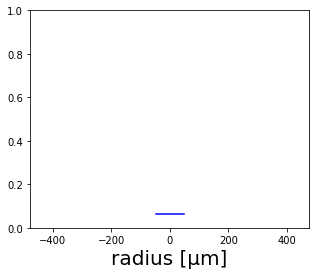

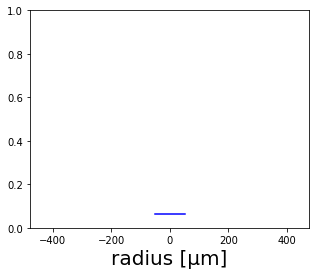

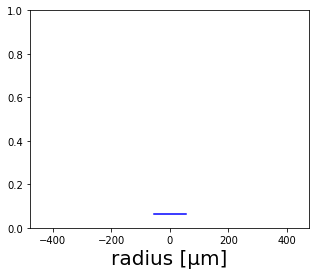

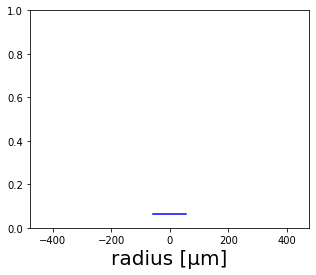

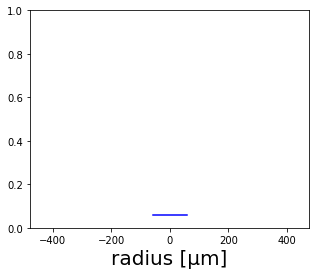

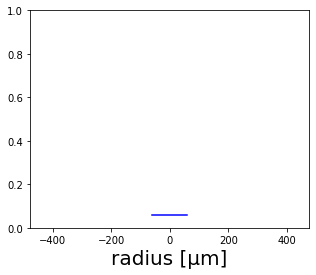

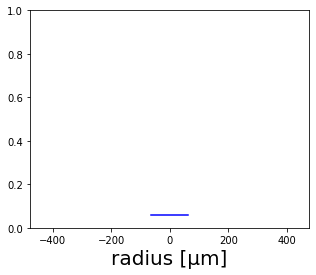

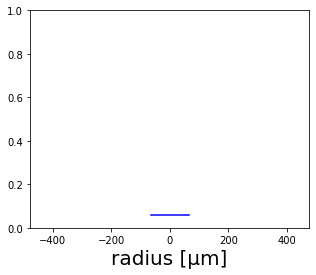

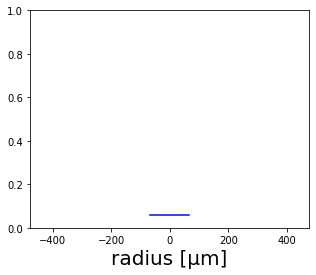

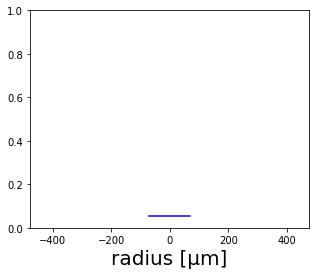

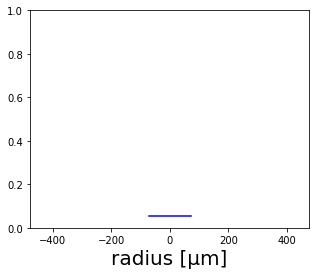

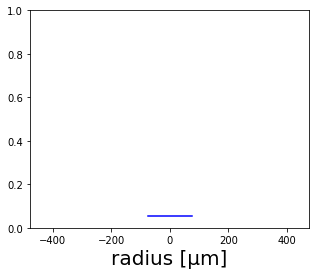

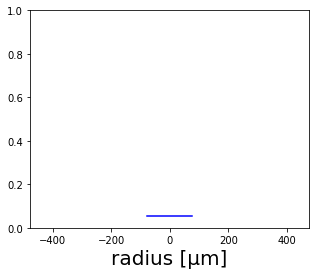

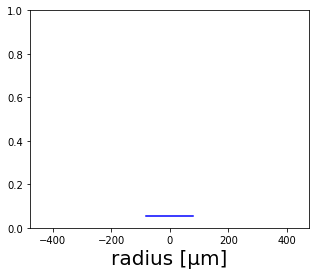

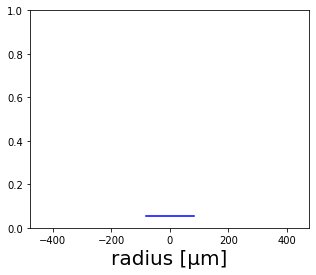

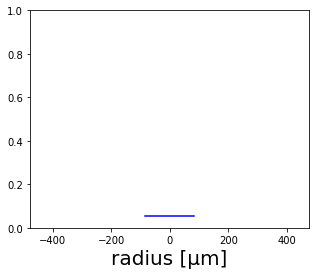

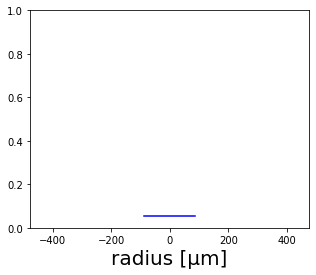

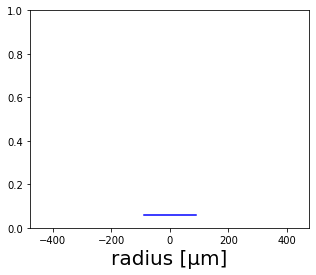

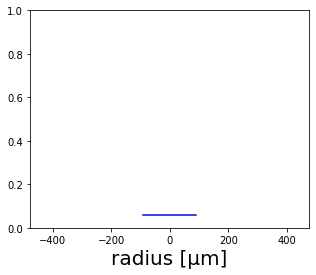

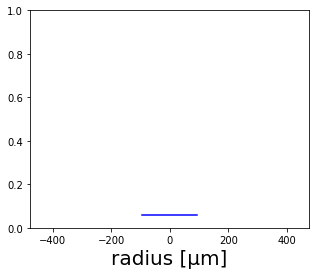

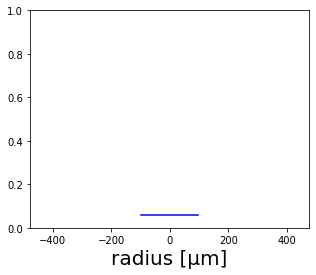

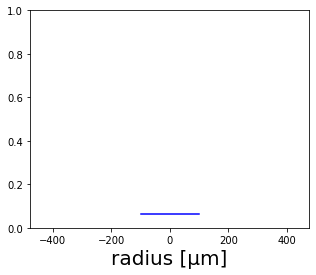

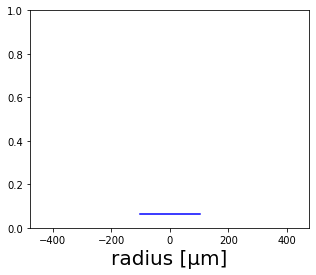

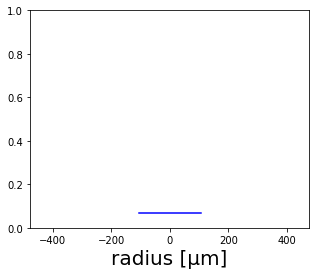

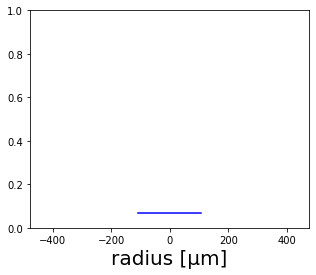

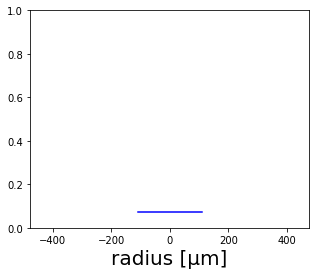

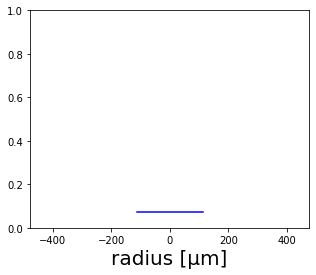

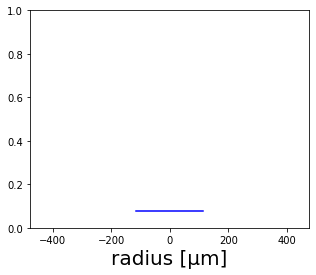

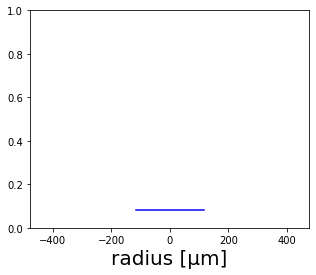

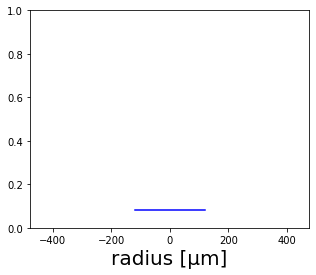

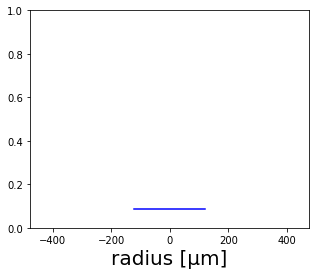

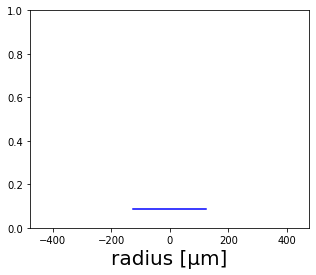

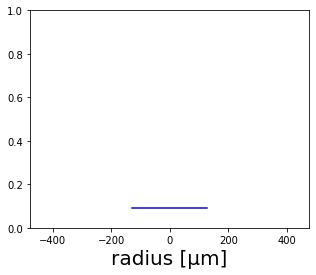

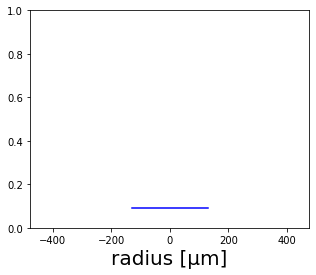

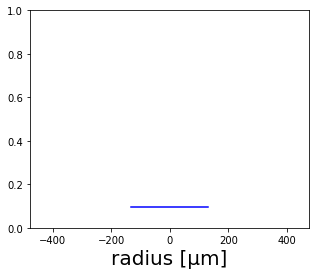

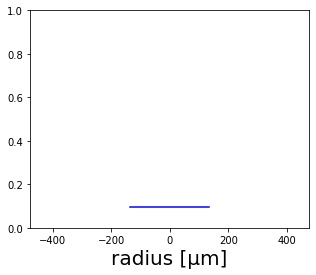

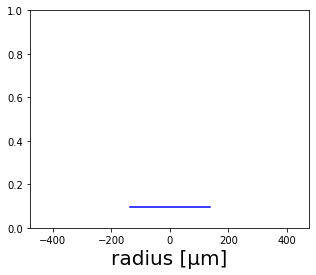

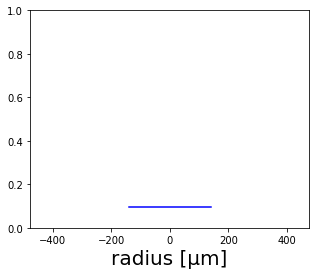

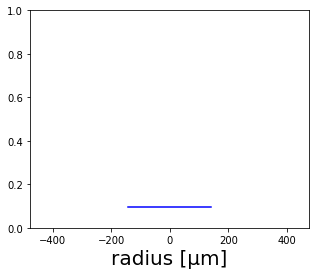

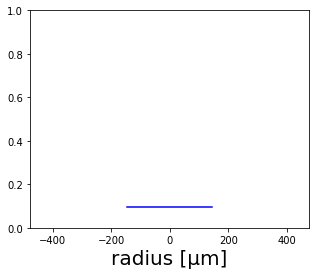

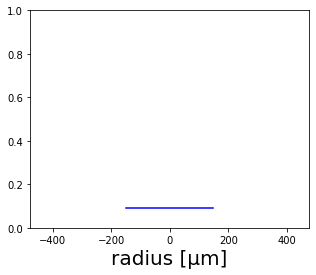

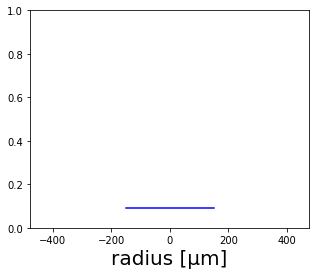

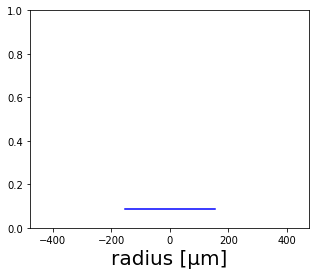

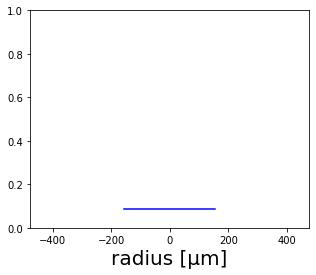

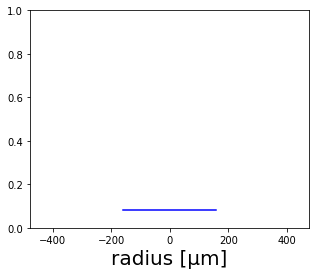

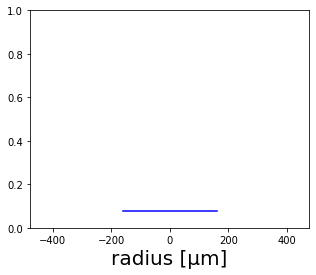

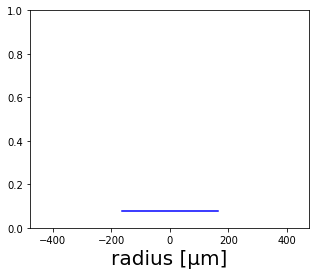

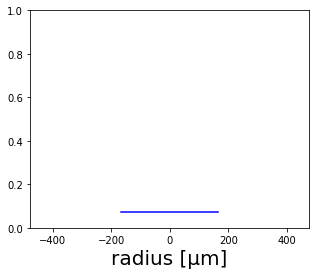

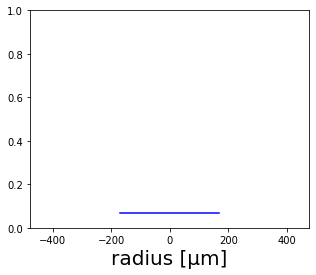

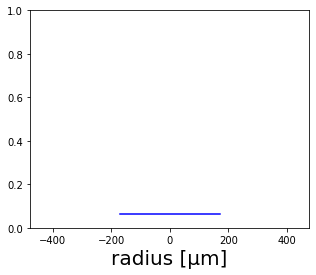

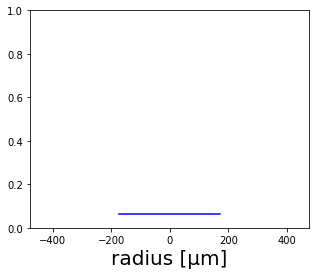

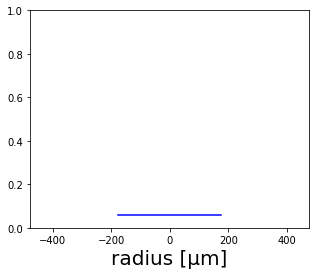

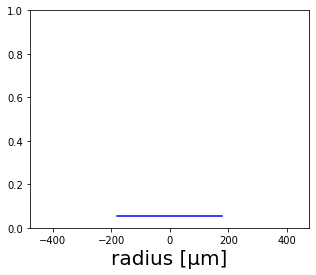

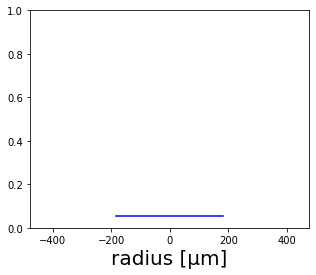

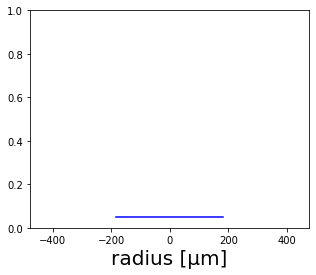

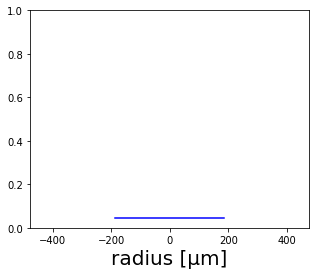

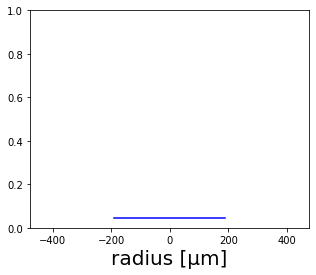

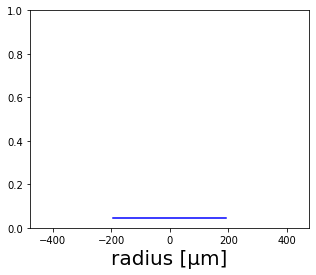

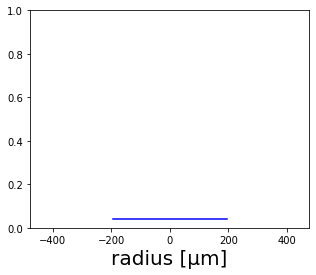

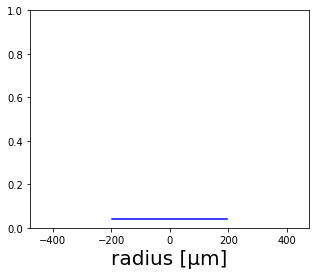

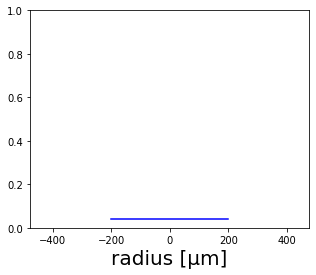

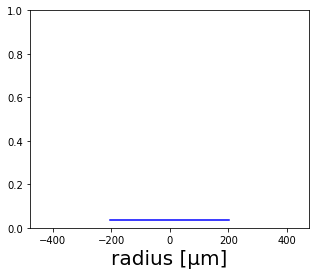

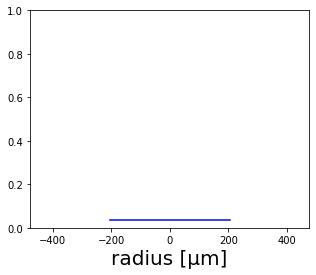

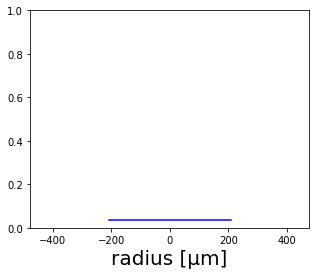

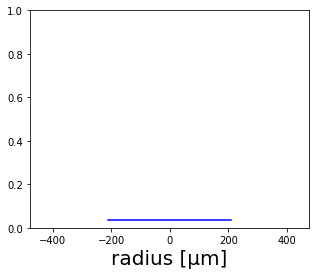

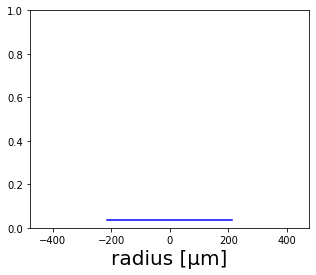

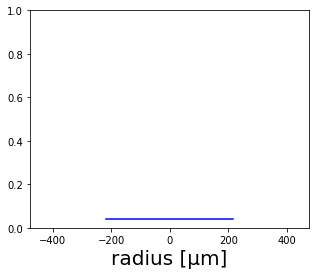

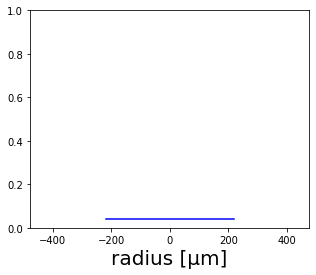

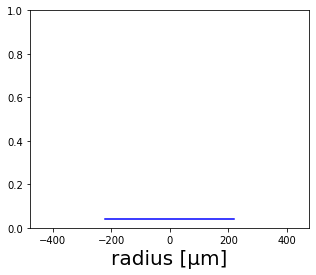

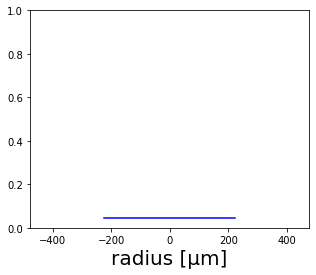

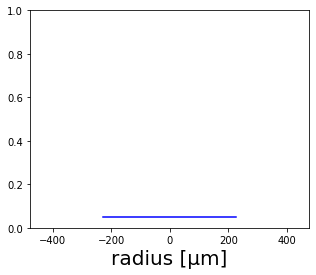

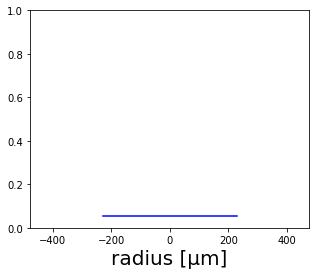

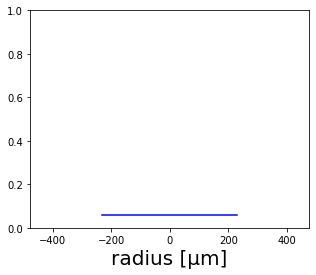

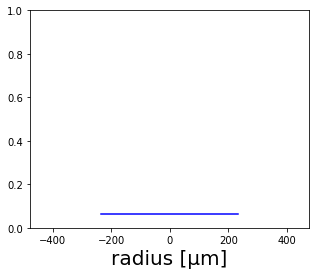

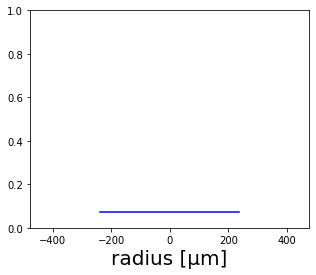

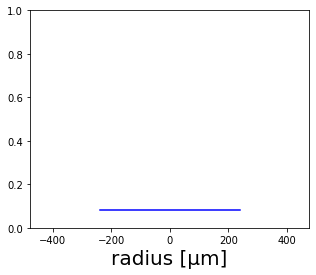

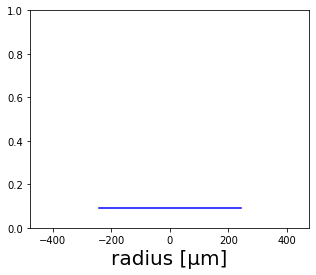

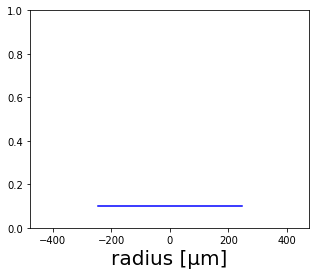

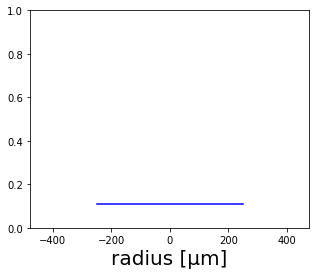

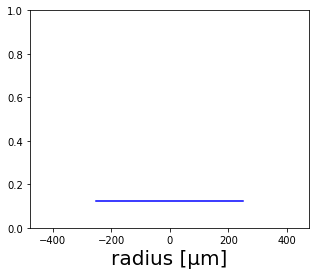

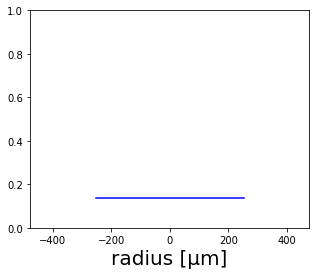

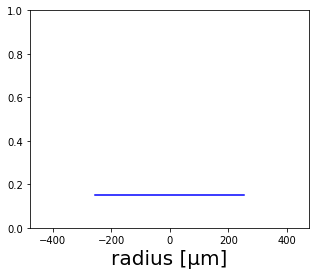

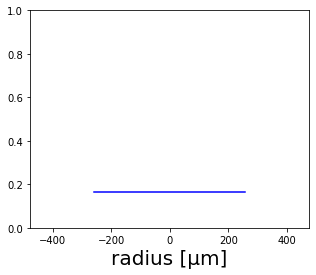

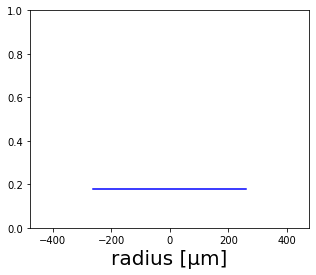

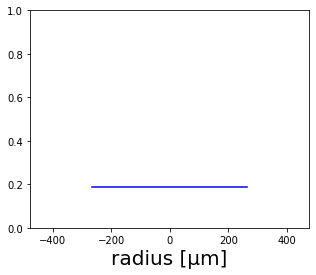

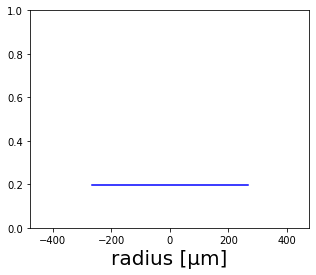

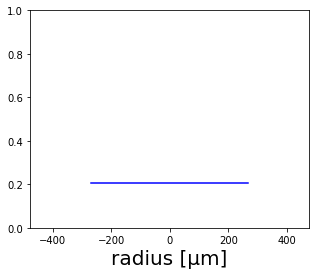

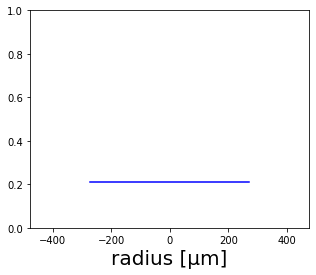

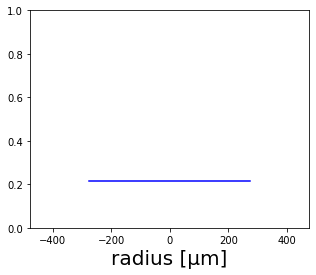

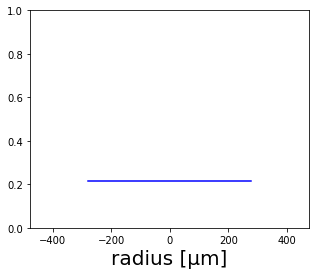

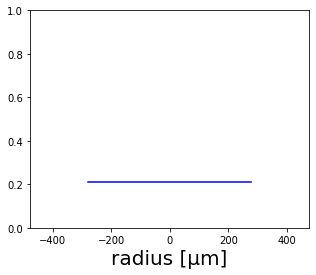

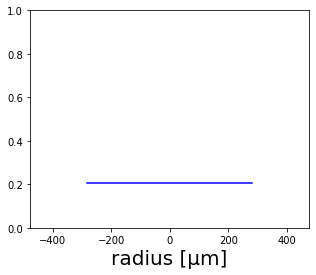

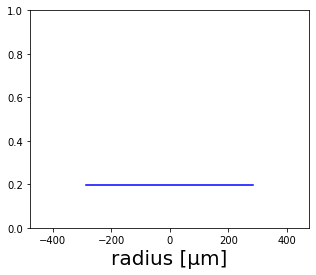

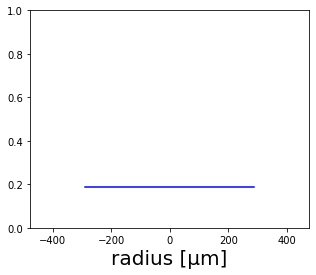

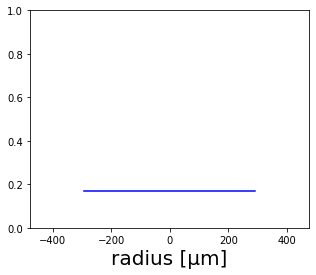

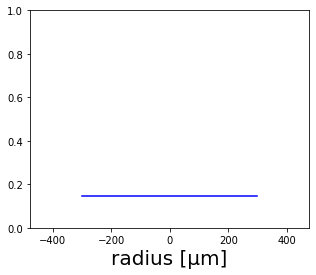

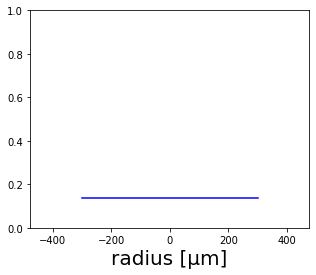

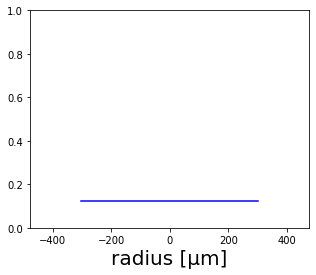

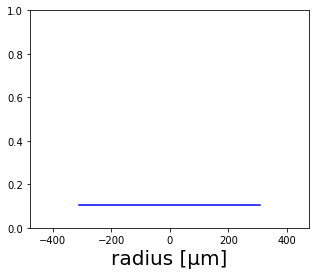

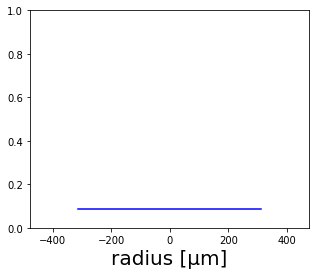

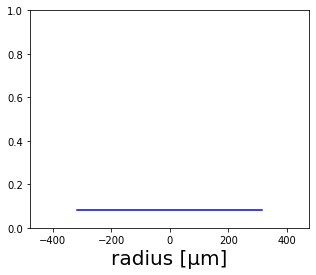

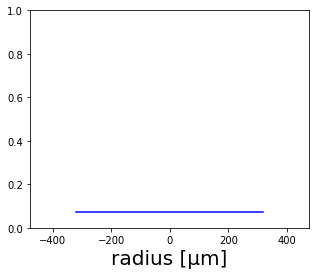

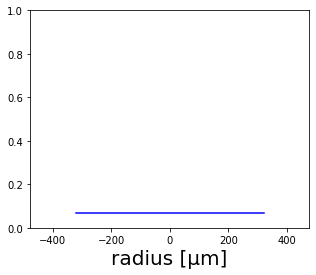

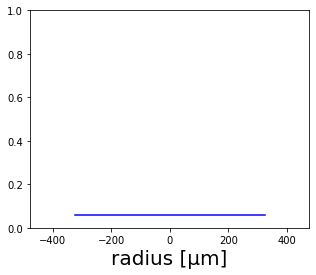

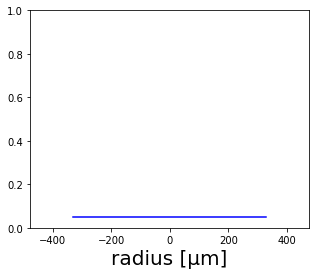

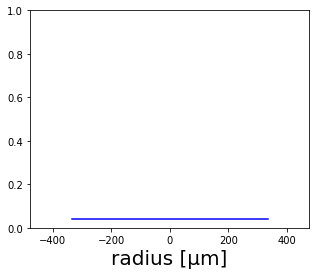

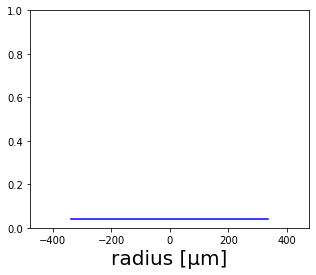

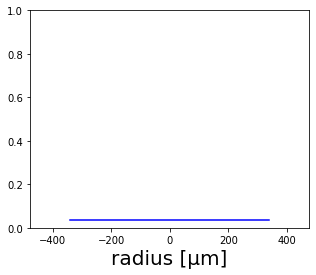

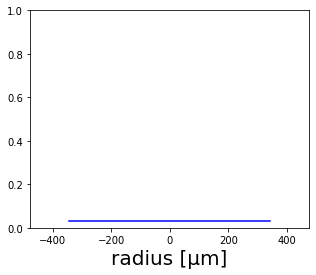

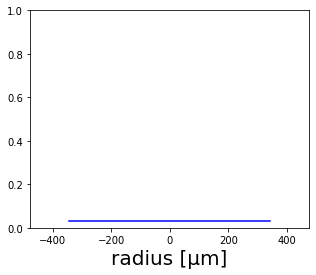

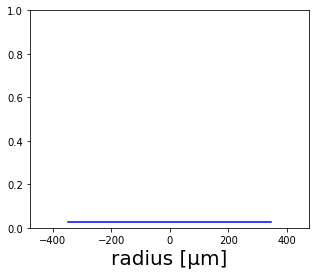

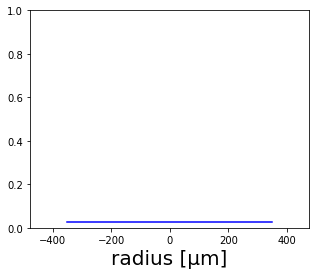

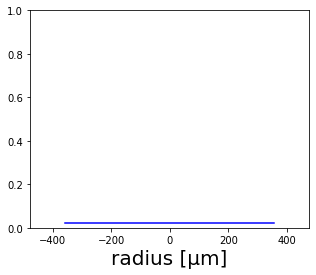

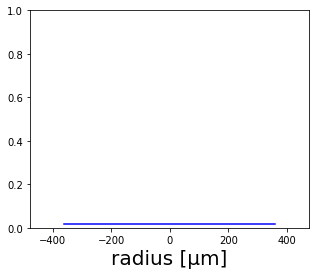

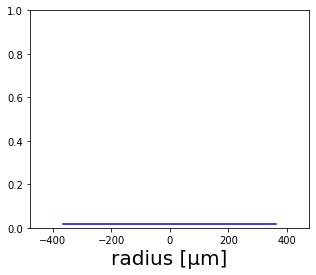

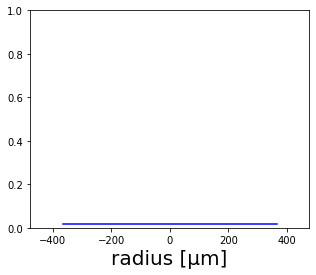

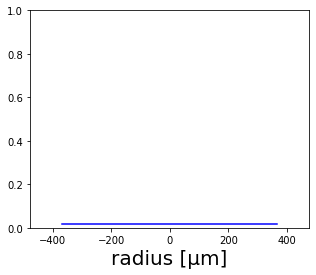

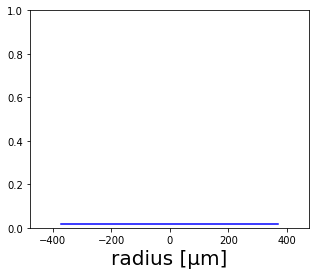

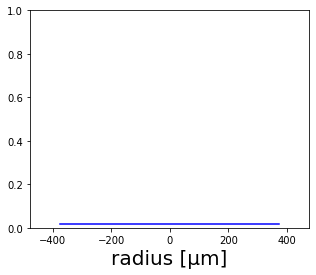

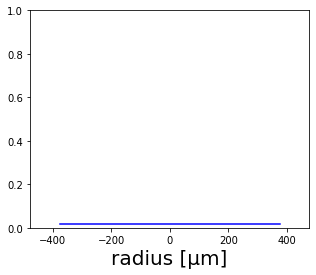

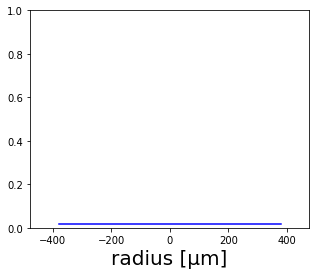

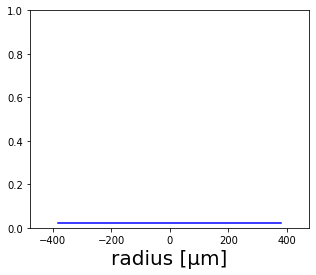

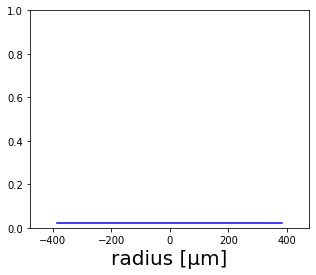

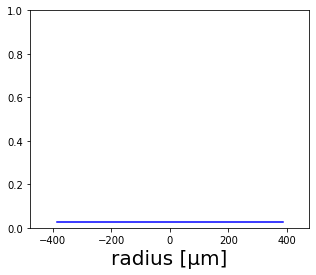

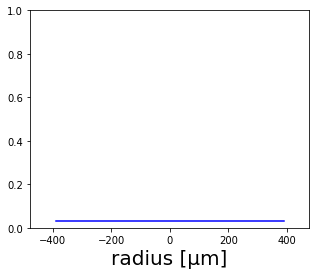

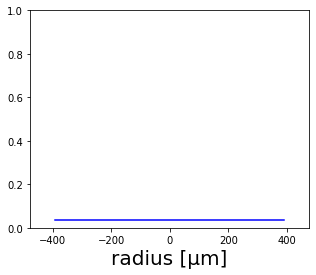

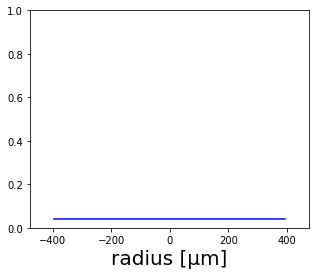

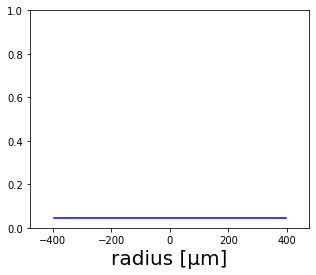

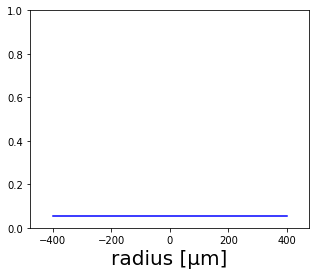

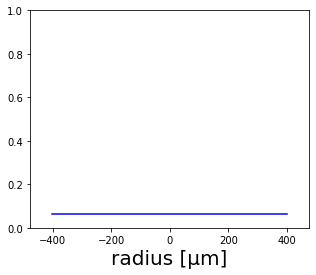

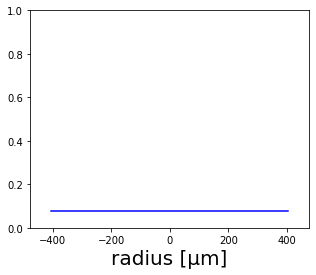

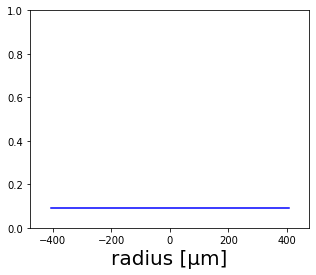

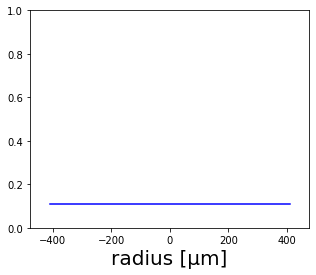

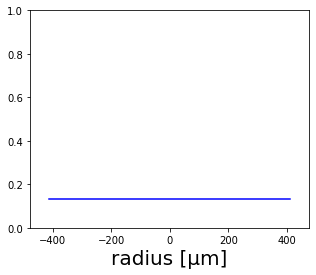

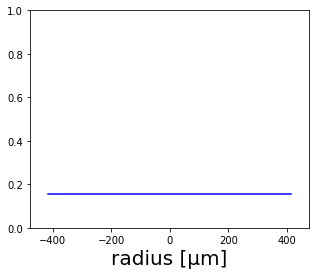

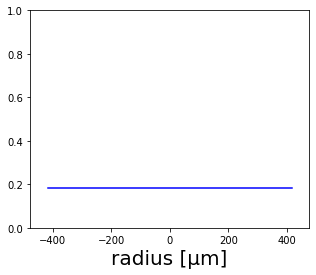

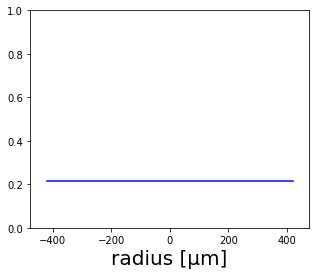

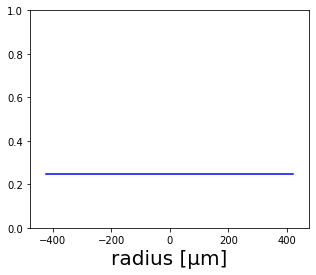

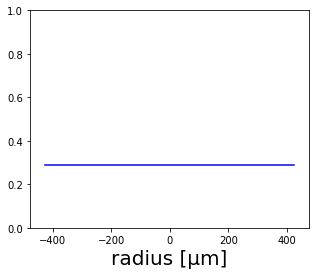

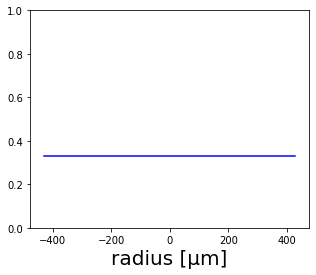

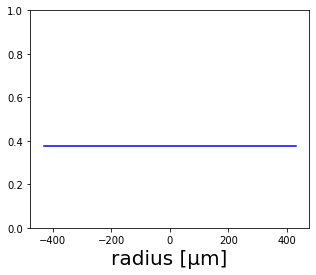

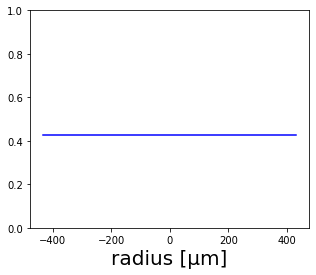

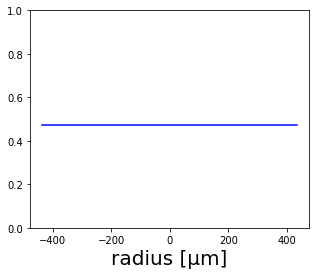

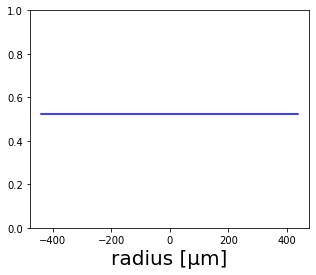

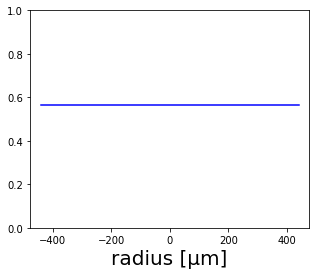

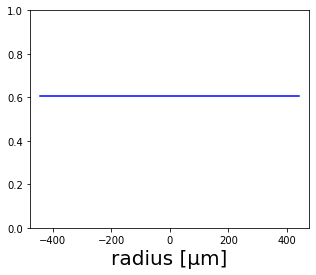

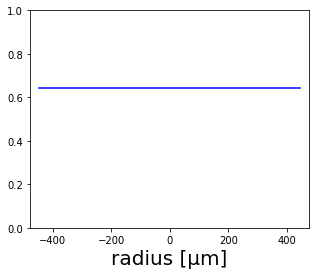

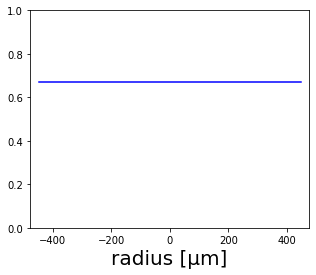

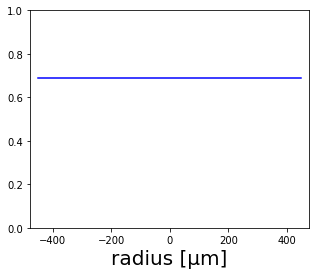

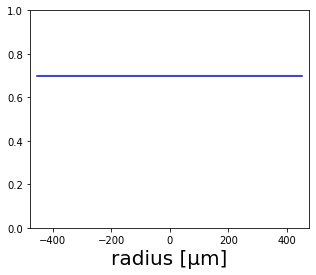

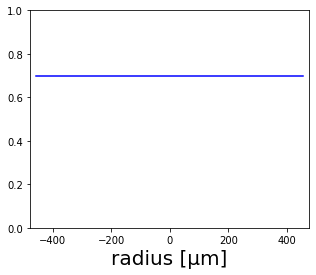

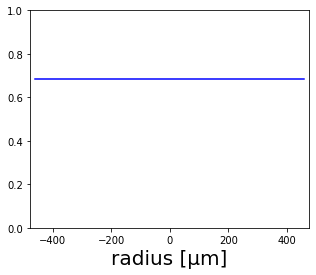

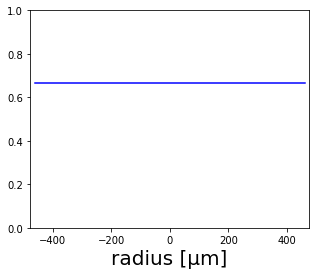

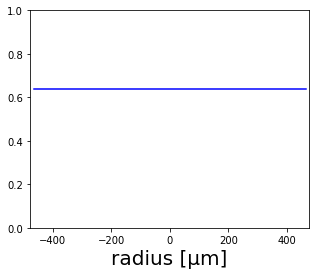

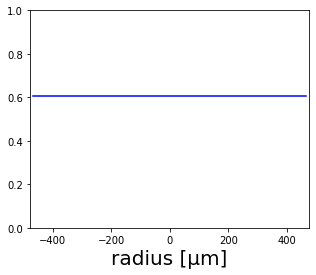

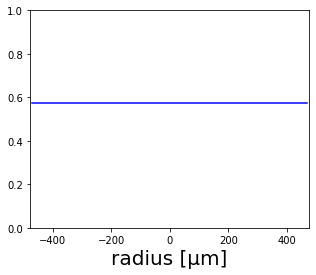

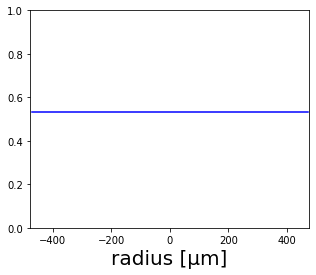

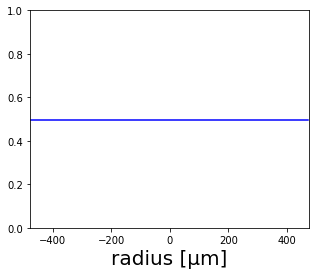

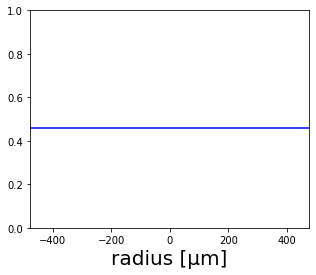

In [55]:
plt.rcParams['figure.figsize'] = 5, 4
for i, d in enumerate(effs):
    plt.figure()
    #plt.plot(d[1], d[2], 'r')
    #plt.plot(d[1], d[3], 'g')
    plt.plot(d[1], d[4], 'b')    
    plt.xlim(-478, 476)
    plt.ylim(0, 1.0)
    #plt.ylabel('Fluorescence [A.U.]', fontsize = 16)
    plt.xlabel(u'radius [\u03bcm]', fontsize = 20)
    z = ''
    if len(str(i)) == 1:
        z='000'
    elif len(str(i)) == 2:
        z='00'
    elif len(str(i)) == 3:
        z='0'
    plt.savefig('No dilution/300 GR: 1.0/plotsB/b' +z+ str(i)+ '.png')
    #plt.savefig('plots/b'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
#plt.show()

### Genero el video de las ondas

In [80]:
image_folder = 'No dilution/300 GR: 1.0/plotsB/'
video_name = 'videoB.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 7, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.release()

### Video Colonia

In [13]:
files = os.listdir('Toggle Switch/pdf/')
files.sort()

### Pasar de .pdf a .png

In [14]:
for filename in files:
    with tempfile.TemporaryDirectory() as path:
         images_from_path = convert_from_path('Toggle Switch/pdf/'+filename, output_folder=path, last_page=1, first_page =0)

    base_filename  =  os.path.splitext(os.path.basename(filename))[0] + '.png'     

    save_dir = 'Toggle Switch/colony/'

    for page in images_from_path:
        page.save(os.path.join(save_dir, base_filename), 'PNG')

In [15]:
image_folder = 'Toggle Switch/colony/'
video_name = 'Toggle Switch/Videos/colony.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 7, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.release()

### Low pass filter

In [62]:
# For all growth rates, BFP
files = ['300 GR: 0.6/data300gr:06.json', 
         '300 GR: 1.0/data300gr:10.json', 
         '300 GR: 1.5/data300gr:15.json', 
         '300 GR: 2.0/data300gr:20.json']

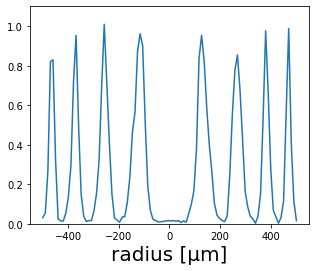

9
11
14
24
14
11
9


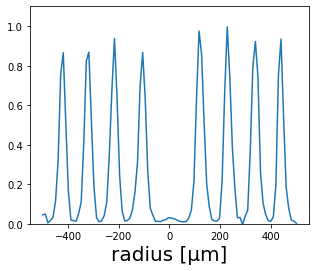

10
10
11
22
11
11
10


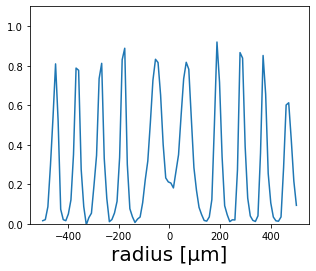

8
10
9
12
12
12
9
9
10


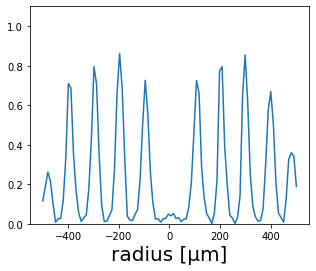

8
10
10
10
20
10
9
10
8


In [64]:
periods = []
for file in files:
    with open(file) as json_file:  
        database = json.load(json_file)
    x = database[len(database)-1][1]
    B = database[len(database)-1][4]   
    tf = np.fft.fft(B)
    coefs = np.fft.fftshift(tf)
    index_max = np.where(coefs==max(coefs))
    coef_filt = coefs[(index_max[0][0]-50):(index_max[0][0]+50)]
    coefs_filt_unshift = np.fft.ifftshift(coef_filt)
    ifft = np.fft.ifft(coefs_filt_unshift)/10
    plt.plot(np.linspace(-500, 501, 100), ifft)
    #plt.ylabel('Fluorescence [A.U.]', fontsize = 20)
    plt.xlabel(u'radius [\u03bcm]', fontsize = 20)
    #plt.title("Growth rate = {}".format(file[8:11]))
    plt.ylim([0, 1.1])
    plt.show();
    
    peaks, _ = find_peaks(ifft.real, height=0.2)
    suma = 0
    for i in range(len(peaks)-1):
        suma += 10*(peaks[i+1] - peaks[i])
        print(peaks[i+1] - peaks[i])
    # NO FUNCIONA MUY BIEN
    periods.append(suma/(len(peaks)-1))
    #print("Promedio " + str(suma/(len(peaks)-1)))

In [6]:
# For growth rates=0.6; R, G and B
files = ['300 GR: 0.6/data300gr:06.json']

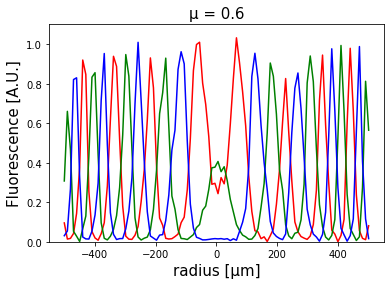

In [12]:
for file in files:
    with open(file) as json_file:  
        database = json.load(json_file)
    
    # Extract R, G, and B signals
    x = database[len(database)-1][1]
    R = database[len(database)-1][2]   
    G = database[len(database)-1][3]   
    B = database[len(database)-1][4]
    
    # Fourier Transform
    tfr = np.fft.fft(R)
    tfg = np.fft.fft(G)
    tfb = np.fft.fft(B)
    
    # FT coefficients
    coefsr = np.fft.fftshift(tfr)
    coefsg = np.fft.fftshift(tfg)
    coefsb = np.fft.fftshift(tfb)
    
    # Max index
    index_maxr = np.where(coefsr==max(coefsr))
    index_maxg = np.where(coefsg==max(coefsg))
    index_maxb = np.where(coefsb==max(coefsb))    

    # Filtered coefficients
    coef_filtr = coefsr[(index_maxr[0][0]-50):(index_maxr[0][0]+50)]
    coef_filtg = coefsg[(index_maxg[0][0]-50):(index_maxg[0][0]+50)]
    coef_filtb = coefsb[(index_maxb[0][0]-50):(index_maxb[0][0]+50)]
    
    # Unshifted coefficients
    coefs_filt_unshiftr = np.fft.ifftshift(coef_filtr)
    coefs_filt_unshiftg = np.fft.ifftshift(coef_filtg)
    coefs_filt_unshiftb = np.fft.ifftshift(coef_filtb)
    
    ifftr = np.fft.ifft(coefs_filt_unshiftr)/10
    ifftg = np.fft.ifft(coefs_filt_unshiftg)/10
    ifftb = np.fft.ifft(coefs_filt_unshiftb)/10
    
    plt.plot(np.linspace(-500, 501, 100), ifftr, 'r')
    plt.plot(np.linspace(-500, 501, 100), ifftg, 'g')
    plt.plot(np.linspace(-500, 501, 100), ifftb, 'b')
    
    plt.ylabel('Fluorescence [A.U.]', fontsize = 15)
    plt.xlabel(u'radius [\u03bcm]', fontsize = 15)
    plt.title('\u03bc = 0.6', fontsize = 15)
    plt.ylim([0, 1.1])
    plt.show();
    
    """
    peaks, _ = find_peaks(ifft.real, height=0.2)
    suma = 0
    for i in range(len(peaks)-1):
        suma += 10*(peaks[i+1] - peaks[i])
        print(peaks[i+1] - peaks[i])
    print("Promedio " + str(suma/(len(peaks)-1)))
    """

In [75]:

periods = [10*(9+11+14+24+14+11+9) / 8, 
           10*(10+10+11+22+11+11+10) / 8, 
           10*(8+10+9+12+12+12+9+9+10) / 9, 
           10*(8+10+10+10+20+10+9+10+8) / 10]

gr = [0.6, 1.0, 1.5, 2.0]
z = np.polyfit(gr, periods, 1)
x = np.linspace(0.6, 2.0, 100)
y = z[0]*x + z[1]

plt.rcParams['figure.figsize'] = 5, 4
plt.plot(gr, periods)
plt.xlabel('growth rate [hr-1]', fontsize = 20)
plt.ylabel('Wavelength [\u03bcm]', fontsize = 20)
plt.plot(x, y, '--r')
plt.legend(['Simulations', 'Linear fitting'])
plt.show();

In [76]:
periods

[115.0, 106.25, 101.11111111111111, 95.0]

In [77]:
z = np.polyfit(gr, periods, 1)
z

array([-13.74153499, 121.86073489])

In [78]:
x = np.linspace(0.6, 2.0, 100)
y = z[0]*x + z[1]

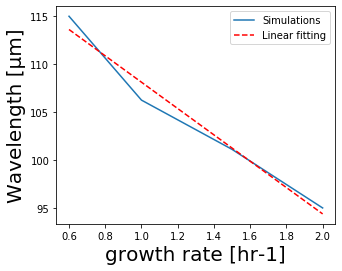

In [79]:
plt.rcParams['figure.figsize'] = 5, 4
plt.plot(gr, periods)
plt.xlabel('growth rate [hr-1]', fontsize = 20)
plt.ylabel('Wavelength [\u03bcm]', fontsize = 20)
plt.plot(x, y, '--r')
plt.legend(['Simulations', 'Linear fitting'])
plt.show();

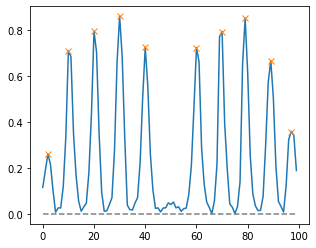

In [73]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(ifft.real, height=0.2)
plt.plot(ifft.real)
plt.plot(peaks, ifft.real[peaks], "x")
plt.plot(np.zeros_like(ifft.real), "--", color="gray")
plt.show()

In [78]:
suma = 0
for i in range(len(peaks)-1):
    suma += 10*(peaks[i+1] - peaks[i])
    print(peaks[i+1] - peaks[i])
print("Promedio " + str(suma/(len(peaks)-1)))

8
10
10
10
20
10
9
10
8
Promedio 105.55555555555556


In [43]:
with open('300 GR: 0.6/data300gr:06.json') as json_file:  
    database = json.load(json_file)

In [44]:
x = database[296][1]
B = database[296][4]

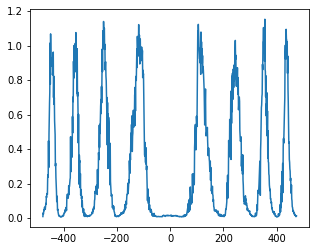

In [45]:
plt.plot(x, B);

In [47]:
#plt.plot(np.fft.fft(B-np.mean(B)))

In [100]:
#tf = np.fft.fft(B-np.mean(B))
tf = np.fft.fft(B)

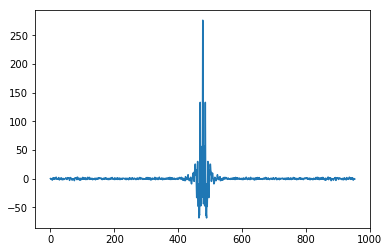

In [101]:
plt.plot(np.fft.fftshift(tf));

In [102]:
coefs = np.fft.fftshift(tf)

In [103]:
index_max = np.where(coefs==max(coefs))

In [104]:
coef_filt = coefs[(index_max[0][0]-50):(index_max[0][0]+50)]

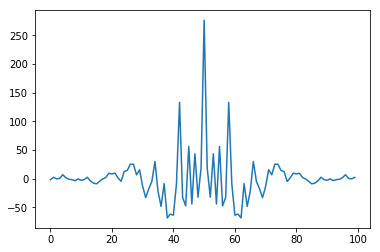

In [105]:
plt.plot(coef_filt);

In [106]:
coefs_filt_unshift = np.fft.ifftshift(coef_filt)

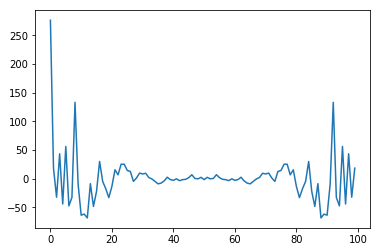

In [107]:
plt.plot(coefs_filt_unshift);

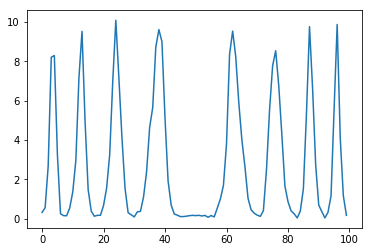

In [108]:
plt.plot(np.fft.ifft(coefs_filt_unshift));

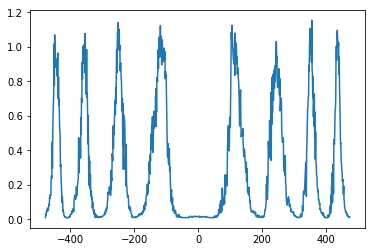

In [65]:
plt.plot(x, B);

### Kymographs for travelling waves

In [2]:
files = ['300 GR: 0.6/data300gr:06.json', 
         '300 GR: 1.0/data300gr:10.json', 
         '300 GR: 1.5/data300gr:15.json', 
         '300 GR: 2.0/data300gr:20.json']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


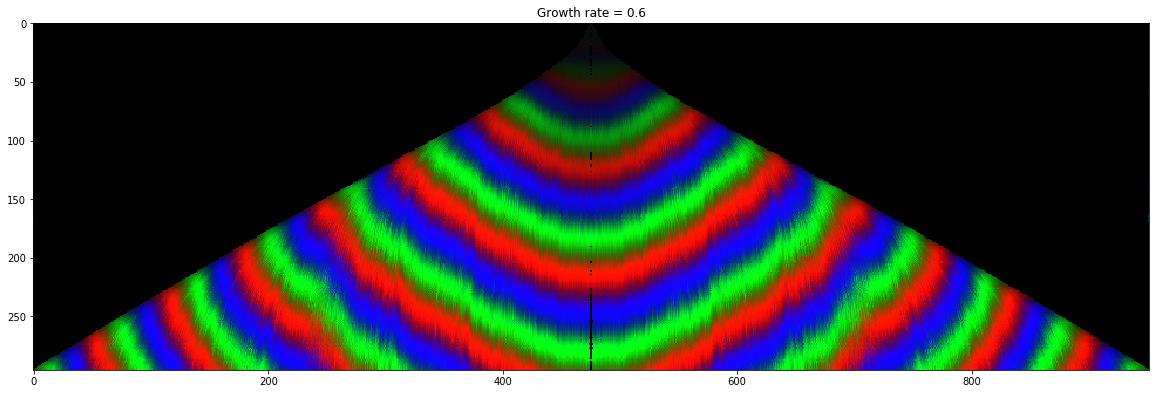

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


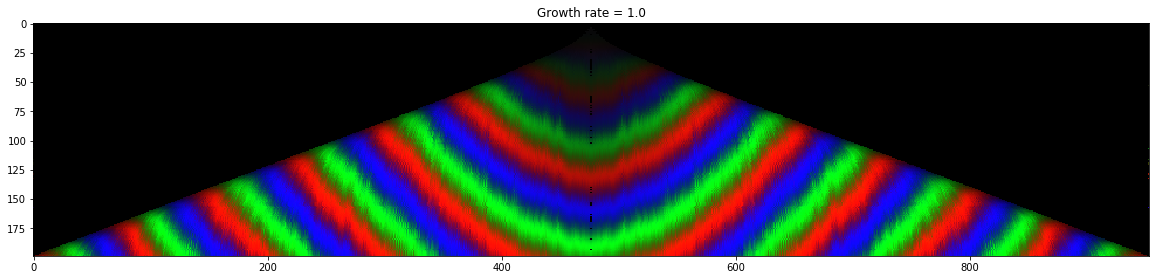

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


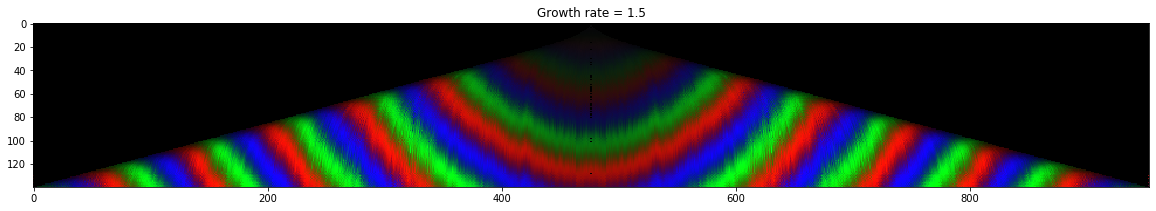

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


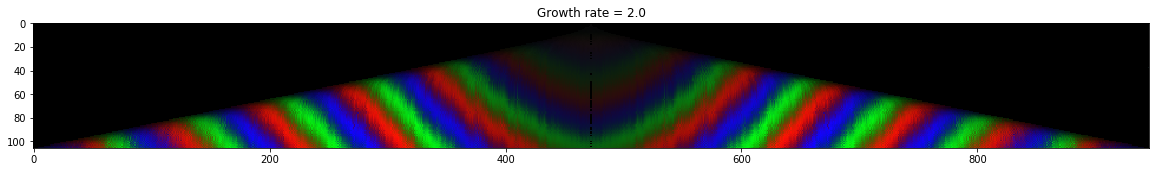

In [35]:
for file in files:
    # Open the file
    with open(file) as json_file:  
        database = json.load(json_file)
    
    db_length = len(database)
    # Time
    t = [d[0] for d in database]

    # Max lenght for the array
    max_ind_0 = np.where(np.array(database[db_length-1][1]) >=0)
    maxima = len(max_ind_0[0])

    # Generate the vectors
    posR = []
    posG = []
    posB = []
    # AREGLAR PARA EL ULTIMO DATO
    for i, d in enumerate(database):
        vec_maxR = np.zeros(maxima)
        vec_maxG = np.zeros(maxima)
        vec_maxB = np.zeros(maxima)
        ind = np.where(np.array(d[1]) >= 0)[0]
        if i == (len(database)-1):
            #vec_max[ind-int((len(d[2])-1)/2)] = np.array(d[2])[ind]
            break
        else:
            vec_maxR[ind-int(len(d[2])/2)] = np.array(d[2])[ind]
            vec_maxG[ind-int(len(d[2])/2)] = np.array(d[3])[ind]
            vec_maxB[ind-int(len(d[2])/2)] = np.array(d[4])[ind]
        posR.append(vec_maxR)
        posG.append(vec_maxG)    
        posB.append(vec_maxB)

    # Save in a 3D array for R, G and B
    posRGB = np.zeros([len(posR), len(posR[0]), 3])
    posRGB[:,:,0] = posR
    posRGB[:,:,1] = posG
    posRGB[:,:,2] = posB

    # CHANGE THE REFLECTION, IT IS JUST TO HAVE AN IDEA
    # Reflect the vectors so we see the whole colony traveling waves
    arr = np.array(posRGB)
    length = len(arr[0])
    posRGB2 = np.zeros([len(posR), 2*len(posR[0]), 3])
    for i in range(3):
        pos = []
        for p in posRGB[:,:,i]:
            max_vector = np.zeros(2*length)
            max_vector[0:length] = np.flip(p)
            max_vector[length:] = p
            pos.append(max_vector)
        posRGB2[:,:,i] = pos

    # PLOT
    plt.rcParams['figure.figsize'] = 20, 40
    plt.title("Growth rate = {}".format(file[8:11]))
    plt.imshow(posRGB2)
    plt.show();

### Kymograph no travelling waves

In [59]:
files = ['No dilution/300 GR: 1.0/data300gr:10.json']

In [3]:
files = ['300 GR: 0.6/data300gr:06.json', 
         '300 GR: 1.0/data300gr:10.json', 
         '300 GR: 1.5/data300gr:15.json', 
         '300 GR: 2.0/data300gr:20.json']

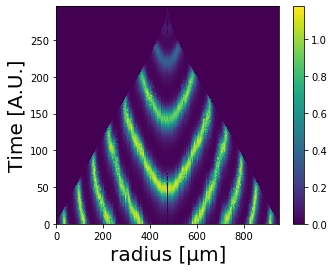

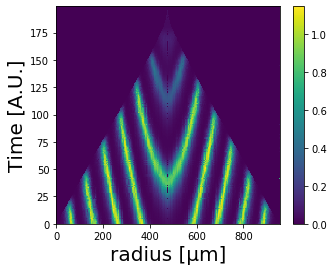

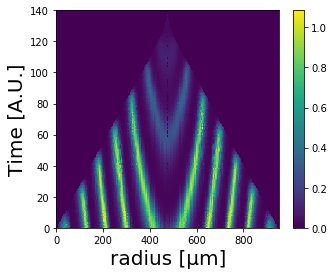

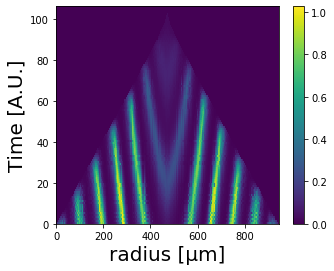

In [21]:
B_all = []
for file in files:
    # Open the file
    with open(file) as json_file:  
        database = json.load(json_file)
    
    db_length = len(database)
    # Time
    t = [d[0] for d in database]

    # Max lenght for the array
    max_ind_0 = np.where(np.array(database[db_length-1][1]) >=0)
    maxima = len(max_ind_0[0])

    # Generate the vectors
    #posR = []
    #posG = []
    posB = []
    # AREGLAR PARA EL ULTIMO DATO
    for i, d in enumerate(database):
        #vec_maxR = np.zeros(maxima)
        #vec_maxG = np.zeros(maxima)
        vec_maxB = np.zeros(maxima)
        ind = np.where(np.array(d[1]) >= 0)[0]
        if i == (len(database)-1):
            #vec_max[ind-int((len(d[2])-1)/2)] = np.array(d[2])[ind]
            break
        else:
            #vec_maxR[ind-int(len(d[2])/2)] = np.array(d[2])[ind]
            #vec_maxG[ind-int(len(d[2])/2)] = np.array(d[3])[ind]
            vec_maxB[ind-int(len(d[2])/2)] = np.array(d[4])[ind]
        #posR.append(vec_maxR)
        #posG.append(vec_maxG)    
        posB.append(vec_maxB)

    # Save in a 3D array for R, G and B
    #posRGB = np.zeros([len(posR), len(posR[0]), 3])
    #posRGB[:,:,0] = posR
    #posRGB[:,:,1] = posG
    #posRGB[:,:,2] = posB

    # CHANGE THE REFLECTION, IT IS JUST TO HAVE AN IDEA
    # Reflect the vectors so we see the whole colony traveling waves
    arr = np.array(posB)
    length = len(arr[0])
    posB2 = np.zeros([len(posB), 2*len(posB[0])])
    for i, p in enumerate(posB):
        max_vector = np.zeros(2*length)
        max_vector[0:length] = np.flip(p)
        max_vector[length:] = p
        posB2[i] = max_vector
    
    B_all.append(posB2)
    # PLOT
    plt.rcParams['figure.figsize'] = 5, 4
    #plt.title("Growth rate = {}".format(file[8:11]))
    #plt.title("No dilution")
    #plt.figure()
    #im = plt.imshow(posB2)
    plt.pcolor(np.flip(posB2))
    plt.colorbar()
    plt.xlabel(u'radius [\u03bcm]', fontsize = 20)
    plt.ylabel('Time [A.U.]', fontsize = 20)
    #plt.xticks([-500, -300, - 100, 100, 300, 500])
    #plt.yticks([])
    plt.show();

In [159]:
j = 2
print(len(B_all[j]))

140


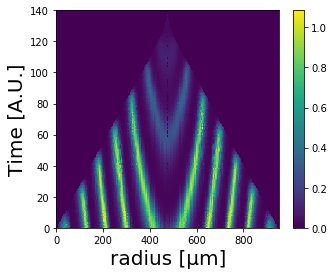

In [160]:
plt.rcParams['figure.figsize'] = 5, 4
plt.pcolor(np.flip(B_all[j]))
plt.colorbar()
plt.xlabel(u'radius [\u03bcm]', fontsize = 20)
plt.ylabel('Time [A.U.]', fontsize = 20)
plt.show();

[329 624]


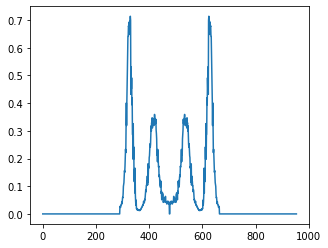

In [172]:
i1 = 60
plt.plot(B_all[j][i1])
plt.plot()

p1 = np.where(B_all[j][i1] >= 0.7)[0]
#p1 = p1[0::3]
print(p1)

[402 551]


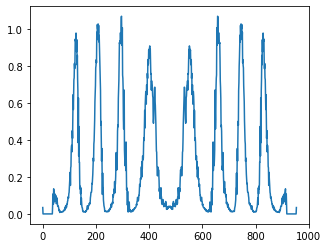

In [178]:
i2 = 130
plt.plot(B_all[j][i2])
plt.plot()

p2 = np.where(B_all[j][i2] >= 0.9)[0]
p2 = p2[int(len(p2)/2)-1:int(len(p2)/2)+1]
print(p2)

In [179]:
dt = i2-i1
(p2-p1)/dt

array([ 1.04285714, -1.04285714])

In [ ]:
# Velocidades
mu=0.6
v=1.26

mu=1.0
v= 1.1

m=1.5
v= 1.04

mu=2.0
v = 0.9

In [200]:
mu = [0.6, 1.0, 1.5, 2.0]
v = [1.26, 1.1, 1.04, 0.9]

In [201]:
z = np.polyfit(mu, v, 1)
z

array([-0.24063205,  1.38180587])

In [202]:
x = np.linspace(0.6, 2.0, 100)
y = z[0]*x + z[1]

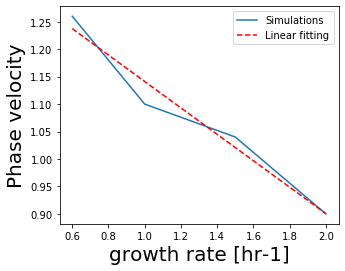

In [204]:
plt.rcParams['figure.figsize'] = 5, 4
plt.plot(mu, v)
plt.xlabel('growth rate [hr-1]', fontsize = 20)
plt.ylabel('Phase velocity', fontsize = 20)
plt.plot(x, y, '--r')
plt.legend(['Simulations', 'Linear fitting'])
plt.show();

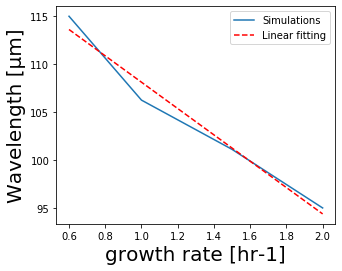

In [196]:
periods = [10*(9+11+14+24+14+11+9) / 8, 
           10*(10+10+11+22+11+11+10) / 8, 
           10*(8+10+9+12+12+12+9+9+10) / 9, 
           10*(8+10+10+10+20+10+9+10+8) / 10]

gr = [0.6, 1.0, 1.5, 2.0]
z = np.polyfit(gr, periods, 1)
x = np.linspace(0.6, 2.0, 100)
y = z[0]*x + z[1]

plt.rcParams['figure.figsize'] = 5, 4
plt.plot(gr, periods)
plt.xlabel('growth rate [hr-1]', fontsize = 20)
plt.ylabel('Wavelength [\u03bcm]', fontsize = 20)
plt.plot(x, y, '--r')
plt.legend(['Simulations', 'Linear fitting'])
plt.show();

Text(0, 0.5, 'Ratio')

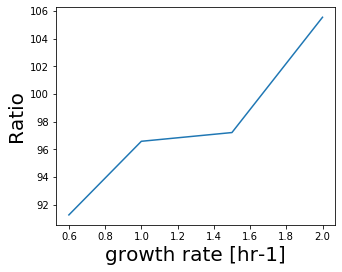

In [208]:
plt.rcParams['figure.figsize'] = 5, 4
plt.plot(mu, np.array(periods)/np.array(v))
plt.xlabel('growth rate [hr-1]', fontsize = 20)
plt.ylabel('Ratio', fontsize = 20)

In [183]:
periods

[115.0, 106.25, 101.11111111111111, 95.0]

In [184]:
v

[1.26, 1.1, 1.04, 0.9]

In [198]:
np.array(periods)/np.array(v)

array([ 91.26984127,  96.59090909,  97.22222222, 105.55555556])